# Swahili news classification using NLP

## Project Overview
News media plays a crucial role in shaping public opinion, informing societies, and influencing political and social discourse. In East Africa, Swahili is one of the most widely spoken languages, serving as a unifying medium for news dissemination across multiple countries, including Tanzania, Kenya, Uganda, Rwanda, Burundi, and the Democratic Republic of Congo.

With the rise of digital journalism, there has been a rapid increase in Swahili news content, necessitating the need for automated classification of Swahili news articles. This project aims to leverage Natural Language Processing (NLP) and Deep Learning to develop a model that can accurately categorize Swahili news content into predefined categories

## Business Understanding

The growing volume of Swahili-language news presents a challenge for media organizations in managing, organizing, and delivering relevant content efficiently. Manual classification is labor-intensive, time-consuming, and prone to inconsistencies, leading to inefficiencies in news dissemination. To address this, automated categorization using Natural Language Processing (NLP) and Deep Learning offers a scalable and reliable solution. By leveraging these technologies, news platforms, media houses, and content aggregators can streamline content management, enhance searchability, and improve audience engagement.

## Objectives

### Automating News Classification.
How can we efficiently categorize Swahili news articles using machine learning and deep learning?
### Understanding Media Trends.
What are the most common news topics in East African media?

Are there any biases in media coverage based on classification trends?

### Enhancing Content Accessibility.
How can automated classification improve information retrieval for journalists, policymakers, and the general public?

## Data Understanding
### Overview
This dataset consists of Swahili news articles categorized into different topics. The goal is to classify news articles into predefined categories using Natural Language Processing (NLP) and Deep Learning techniques.

### Data Structure
The dataset contains the following columns:

id: A unique identifier for each news article.

content: The text of the news article written in Swahili.

category: The label representing the category of the news article (e.g., uchumi, kitaifa, michezo).

### Categories in the Data
The dataset has multiple categories representing different types of news. Some of the common categories include:

Uchumi (Economy): Articles related to business, finance, and economic activities.

Kitaifa (National News): General news related to Tanzania.

Michezo (Sports): News about sports teams, events, and athletes.

(Other categories may exist and need to be explored further.)

### Data Size and Distribution
To understand the dataset better, key aspects to analyze include:

The total number of articles.

The distribution of articles across different categories (class imbalance analysis).

The average length of articles in terms of word count.

### Data Quality Issues
Potential issues to check before preprocessing:

Missing values: Are there any missing or empty fields?

Duplicates: Are there repeated news articles?

Class imbalance: Are some categories significantly overrepresented compared to others?

Noise in text: Presence of irrelevant characters, symbols, or stopwords that may need cleaning.

## Problem Statement  
The goal of this project is to build a Swahili news classification model that accurately categorizes news articles into six predefined categories:

- uchumi (economy)

- kitaifa (national news)

- michezo (sports)

- kimataifa (international news)

- burudani (entertainment)

- afya (health)

To achieve this, we will preprocess the text data to remove noise, tokenize, and normalize the text, followed by building a classification model. To ensure a clear, reproducible, and scalable approach, we will implement the preprocessing steps within an Scikit-learn Pipeline.

# Data Exploration

## Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder , FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, Conv1D, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from transformers import BertTokenizer, TFBertForSequenceClassification, AdamWeightDecay, create_optimizer, BertConfig
import importlib
importlib.reload(text_classifier)
import text_classifier
from text_classifier import TextClassifier
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.callbacks import Callback
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Check the first 5 and last 5 columns

This is to check for consisteny through the data. From this we can also see the columns we  are working with.

In [ ]:
# Loading the training dataset
train_df = pd.read_csv('data/train.csv')
train_df.head()

id                                            content category
0   SW4670   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1  SW30826   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2  SW29725  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3  SW20901   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4  SW12560   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa

In [ ]:
train_df.tail()

id                                            content category
23263  SW24920   Alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi
23264   SW4038   Na NORA DAMIAN-DAR ES SALAAM  TEKLA (si jina ...  kitaifa
23265  SW16649   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266  SW23291   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267  SW11778   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

#### Observation:  
1. The data maintains uniformity from top to bottom.
2. The columns are: (id, content, category).
3. The train data has 23268 entries.

In [ ]:
# Loading the testing dataset
test_df = pd.read_csv('data/test.csv')
test_df.head()

text     label
0   BUNGE limehakikishiwa kuwa hakuna changamoto ...   kitaifa
1   Twiga ilicheza mechi ya kirafiki na Kenya kwe...   michezo
2  ['Miaka mitano iliyopita Harry Maguire alikuwa...   michezo
3  Bethsheba Wambura, Dar es Salaam Msanii wa Bon...  burudani
4  \nMwekezaji wa Klabu ya Simba, Mohammed Dewji ...   michezo

In [ ]:
test_df.tail()

text    label
7333   Kamati hiyo ilibainisha kuwa moja ya mapunguf...   uchumi
7334  ARODIA PETER-DODOMA HOSPITALI ya Rufaa ya Benj...  kitaifa
7335   WAKATI mazoezi ya timu ya taifa ya Tanzania (...  michezo
7336  \n\tNa Suleiman Rashid Omar-Pemba\n \n\n \n\tW...  kitaifa
7337   BAO pekee lililofungwa na mshambuliaji wa Yan...  michezo

#### Observation:  
1. The data also maintains uniformity.
2. The columns are (text and label). This set of data does not have an id column.However the text and content columns are similar and also label and category.
3. The test data has 7338 entries.

### Check the details of the datasets

Here we are going to check the number of non-null values and the datatypes of the data in the columns.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23268 entries, 0 to 23267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        23268 non-null  object
 1   content   23268 non-null  object
 2   category  23268 non-null  object
dtypes: object(3)
memory usage: 545.5+ KB


#### Observation
1. We can see we do not have null values in the dataset

### Check the categories in the category column.

This being the target we check the categories we are dealing with.

In [ ]:
train_df['category'].unique()

array(['uchumi', 'kitaifa', 'michezo', 'kimataifa', 'burudani', 'afya'],
      dtype=object)

#### Observation
The categories are:
1. uchumi - This is the economy category of the news.
2. kitaifa - This is the national news category.
3. michezo - This is the sports news category.
4. kimataifa- this is the international news category.
5. burudani - This is the entertainment news category.
6. afya - this is the health news category.

#### Check the number of values in the categories.

Here we check the number of occurences of each category.

In [ ]:
train_df['category'].value_counts()

kitaifa      10242
michezo       6004
burudani      2229
uchumi        2028
kimataifa     1906
afya           859
Name: category, dtype: int64

The value counts in order of most frequent to least frequent is:
1. kitaifa   -   10242
2. michezo   -    6004
3. burudani  -    2229
4. uchumi   -     2028
5. kimataifa  -   1906
6. afya     -      859

# Data cleaning

In this step we are going to prepare the data for exploratory data analysis (EDA) and preprocessing. The clleaning objectives are:
1. Lowercasing – Convert all text to lowercase to maintain uniformity.

2. Removing Special Characters & Punctuation – Strip out unnecessary symbols (e.g., !?,.) to clean the text.

3. Removing Stopwords – Remove common Swahili stopwords (requires a Swahili stopwords list, which exists inside the `data` folder as a csv file).

4. Tokenization – Split the text into individual words for further processing.

5. Lemmatization/Stemming – Normalize words to their base form. This is done by removing suffixes and prefixes (this requires a Swahili NLP package).

6. Vectorization – Convert the processed text into numerical features using TF-IDF or CountVectorizer.

We are goiung to implement these steps im a pipeline to automate the process.


#### Check for Null Values

Null values affect EDA and Modeling negatively and have to be removed from data.  

In [ ]:
test_df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
train_df.isna().sum()

id          0
content     0
category    0
dtype: int64

Both the train and test dataset do not have null values.

#### Check for duplicated entries

Duplicates mess with EDA accuracy and model perfomance. We need to deal with them before these steps.

In [ ]:
train_df.duplicated().sum()

0

The data does not have duplicated values

#### Drop unnecessary columns

Identity columns contribute nothing to modeling and EDA. In this case the ID column has to be dropped.

In [ ]:
# Drop 'id' column before processing
train_df = train_df.drop(columns=["id"])
train_df

content category
0       Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1       PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2      Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3       TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4       Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa
...                                                  ...      ...
23263   Alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi
23264   Na NORA DAMIAN-DAR ES SALAAM  TEKLA (si jina ...  kitaifa
23265   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

[23268 rows x 2 columns]

#### Loading the stopwords from the csv file

Stop words are common language occuring words which contribute to grammatical correctness of a text but do not hold much meaning in the message of the text. In modelling these words are noise and have to be removed. The natural language toolkit (NLTK) doesn't have a Swahili library hence we imported the stopwords from an external source.

In [ ]:
# Load Swahili stopwords from CSV
stopwords_df = pd.read_csv("data/Common Swahili Stop-words.csv")
stopwords_df.head()

StopWords
0      tuna
1   ilikuwa
2     kisha
3      pili
4     mbaya

In [ ]:
# We convert it to a set for fast lookup
swahili_stopwords = set(stopwords_df["StopWords"].dropna())
swahili_stopwords

{'a',
 'acha',
 'afanaleki',
 'aidha',
 'akiwa',
 'ala',
 'ali',
 'alia',
 'aliendelea',
 'alikuwa',
 'aliweza',
 'ama',
 'ambacho',
 'ambako',
 'ambalo',
 'ambamo',
 'ambao',
 'ambapo',
 'ambaye',
 'anafanya',
 'anafikiri',
 'anajua',
 'anakwenda',
 'anatakiwa',
 'anatokea',
 'anaye',
 'angali',
 'anza',
 'atakuwa',
 'au',
 'b',
 'baada',
 'baada ya',
 'baadaye',
 'baadhi',
 'barabara',
 'basi',
 'bila',
 'bora',
 'budi',
 'c',
 'cha',
 'chake',
 'chako',
 'chini',
 'chochote',
 'chote',
 'd',
 'dhidi',
 'duu',
 'e',
 'ebo',
 'ewaa',
 'f',
 'fauka',
 'g',
 'h',
 'hadi',
 'haiyumkini',
 'halafu',
 'halikadhalika',
 'hao',
 'haohao',
 'hapa',
 'hapana',
 'hapo',
 'haraka',
 'harakaharaka',
 'hasa',
 'hasha',
 'hata',
 'hii',
 'hili',
 'hilihili',
 'hivi',
 'hivyo',
 'hivyohivyo',
 'hiyo',
 'hiyohiyo',
 'hizi',
 'hizo',
 'huko',
 'hukohuko',
 'huku',
 'hukuhuku',
 'humu',
 'humuhumu',
 'huo',
 'huohuo',
 'hususani',
 'huu',
 'ila',
 'ile',
 'ilhali',
 'ili',
 'ilikuwa',
 'ingawa',
 'inga

### Defining the suffixes and prefixes for lemmatization

As defined above, lemmatization is the removal of prefixes and suffixes from data to return them to their base form. For this we require the prefix and suffix list. Below are the lists of suffixes and prefixes gotten from multiple searches across the web.

In [ ]:

swahili_suffixes = [
            'ni', 'to', 'ua', 'ika', 'eka', 'wa', 'ka', 'sha', 'la', 'lo', 'zo', 'e', 'ye', 'mo', 'ji', 'po'
        ]
swahili_suffixes

['ni',
 'to',
 'ua',
 'ika',
 'eka',
 'wa',
 'ka',
 'sha',
 'la',
 'lo',
 'zo',
 'e',
 'ye',
 'mo',
 'ji',
 'po']

In [ ]:
swahili_prefixes = [
            'm', 'wa', 'ki', 'vi', 'u', 'zi', 'ku', 'pa', 'mu', 'ni', 'tu', 'hu', 'ha', 'me', 'ta', 'li',
            'si', 'hatu', 'ham', 'hawa', 'hu', 'ha', 'a', 'ya'
        ]
swahili_prefixes

['m',
 'wa',
 'ki',
 'vi',
 'u',
 'zi',
 'ku',
 'pa',
 'mu',
 'ni',
 'tu',
 'hu',
 'ha',
 'me',
 'ta',
 'li',
 'si',
 'hatu',
 'ham',
 'hawa',
 'hu',
 'ha',
 'a',
 'ya']

## Text Preprocessing Steps (Implemented in a Pipeline)


### Cleaning Function
Here, we will have a class called `SwahiliTextCleaner`, that inherits attributes from sklearn's BaseEstimator and TransformerMixin classes.  
We will define the various steps it will take in cleaning the text, then later apply it to both the `train_df` and the `test_df`.  
Our `preprocessing_pipeline` will then include both the `SwahiliTextCleaner` and the `TfidfVectorizer`.

In [ ]:
class SwahiliTextCleaner(BaseEstimator, TransformerMixin):
    def lemmatize(self, text):
        # Remove prefixes only if the remaining word is reasonable
        for prefix in swahili_prefixes:
            if text.startswith(prefix) and len(text) > len(prefix) + 2:  # Keep at least 3 characters after removal
                text = text[len(prefix):]
                break  # Stop after the first valid match

        # Remove suffixes only if the remaining word is reasonable
        for suffix in swahili_suffixes:
            if text.endswith(suffix) and len(text) > len(suffix) + 2:
                text = text[:-len(suffix)]
                break  # Stop after the first valid match

        return text
    def clean_text(self, text):
        # Convert to string (handle any non-string entries)
        text = str(text)
        # Remove newline (`\n`), tab (`\t`), and extra spaces
        text = re.sub(r"\s+", " ", text)
        # Remove punctuation and special characters
        text = re.sub(f"[{string.punctuation}]", "", text)
        # Remove brackets (handles cases like row 2 in test set)
        text = re.sub(r"[\[\]]", "", text)
        # Convert to lowercase
        text = text.lower()
        # Tokenization using NLTK
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in swahili_stopwords]
        # Lemmatization (combined prefix + suffix removal)
        tokens = [self.lemmatize(word) for word in tokens]
        # Join words back to a sentence
        return " ".join(tokens)

    def fit(self, X, y=None):
        return self  # coz no fitting needed

    def transform(self, X):
        return X.apply(self.clean_text)

In [ ]:
# Instantiate the cleaner
cleaner = SwahiliTextCleaner()

# create a copy of the training dataframe
train_df_copy = train_df.copy()

# Perform the cleaning on the copied data
train_df_copy['clean_text'] = cleaner.fit_transform(train_df['content'])

# Save to CSV
with open('data/cleaned_text.csv', mode='w', encoding='utf-8', newline='') as file:
    train_df_copy.to_csv(file, index=False)


train_df_copy.head()


content category  \
0   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi   
1   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa   
2  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi   
3   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo   
4   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa   

                                          clean_text  
0  bodi talii nzania ttb imesema itafanya isafara...  
1  pendo fundishambeya rais dk john agufuri metan...  
2  wandishi wetu ngida benki nmb imetoa saada faa...  
3  timu ifa nzania serengeti boys jana ilijiw naf...  
4  gatha charles – dar es salaam liyeku katibu bu...

## Feature engineering.

### Creating Text length and word count columns

In [ ]:
# Add text length and word count for analysis
train_df_copy['text_length'] = train_df_copy['clean_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
train_df_copy['word_count'] = train_df_copy['clean_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Exploratory Data Analysis

## Univariate Analysis

#### **Class Frequency**

In [ ]:
class_counts = train_df_copy['category'].value_counts().reset_index()
class_counts.columns = ['category', 'count']  # Rename columns

fig_category = px.bar(class_counts,
                      x='category', y='count',
                      title='Class Distribution',
                      labels={'category': 'Category', 'count': 'Count'},
                      color='category',
                      color_discrete_sequence=px.colors.qualitative.Set1)

fig_category.write_image('class_distribution.jpg')
fig_category.show()

This plot shows the class distribution for the dataset, which highlights some key insights:

#### **Insight**:
kitaifa is the most frequent category with approximately 10,000 samples.
The occurrence in order of frequency is as follows:
1. Kitaifa - 10242 entries
2. Michezo - 6004 entries
3. Burudani - 2229 entries
4. Uchumi - 2028 entries
5. Kimataifa - 1906 entries
6. Afya - 859 entries

## Wordcloud

In [ ]:
#function to create wordcloud
def create_wordcloud(words):  # takes input as string
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

##### Wordcloud for category 'Uchumi'

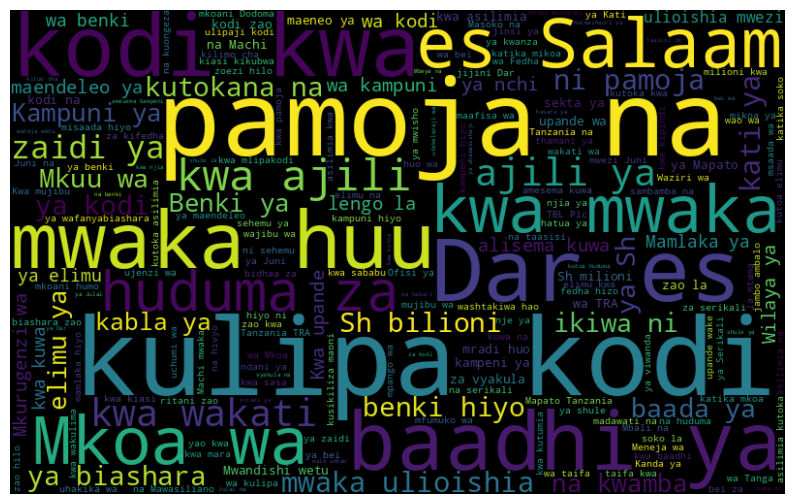

In [ ]:
# wordcloud for category Uchumi
subset=train_df_copy[train_df_copy.category=="uchumi"]
text=subset.content.values # list of sentences
words =" ".join(text)# convert list of sentences into a paragraph of sentences
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: kulipa, kodi, benki, kampuni etc.

##### Wordcloud for category 'Kitaifa'

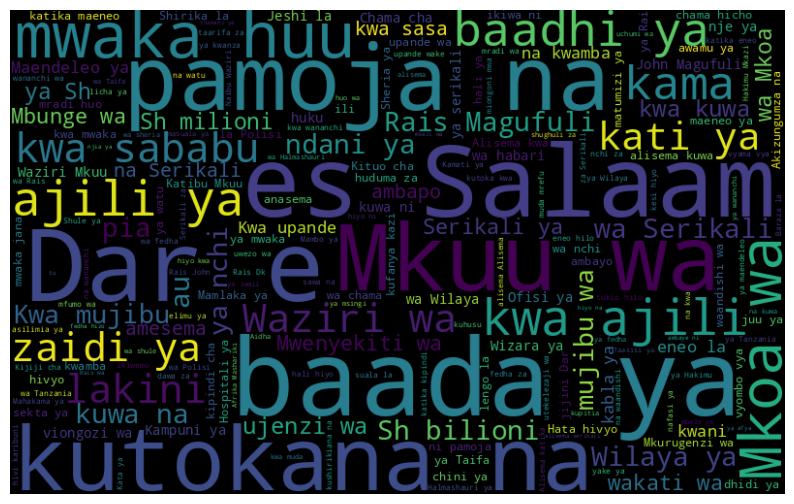

In [ ]:
# wordcloud for category Kitaifa
subset=train_df_copy[train_df_copy.category=="kitaifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: waziri, mkuu, wilaya, mkoa, Rais magufuli etc.

##### Wordcloud for category 'Michezo'

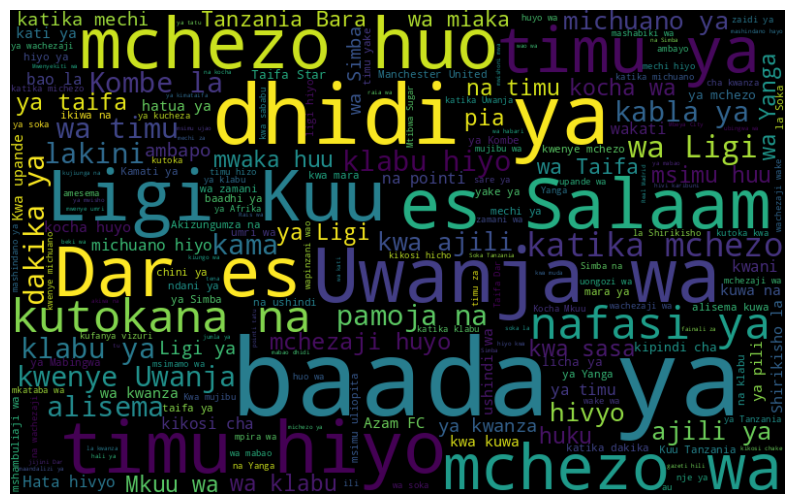

In [ ]:
# wordcloud for category Michezo
subset=train_df_copy[train_df_copy.category=="michezo"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: mchezo, uwanja, timu, klabu, dhidi ya, ligi, kombe, etc.

##### Wordcloud for category 'kimataifa'

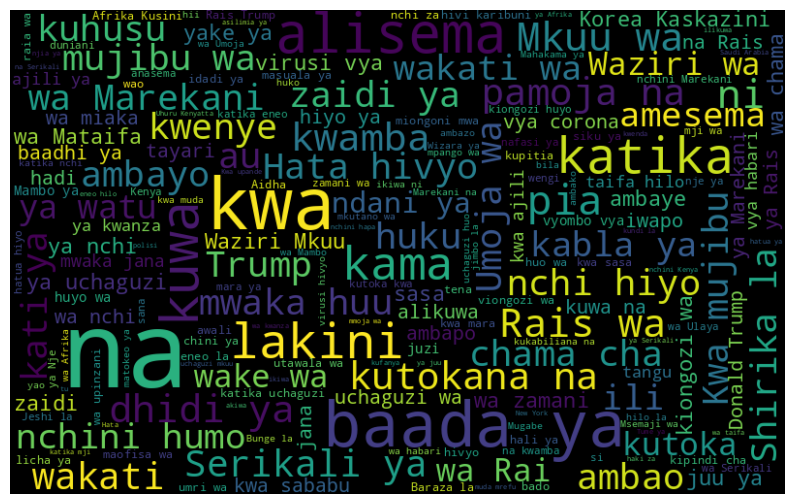

In [ ]:
# wordcloud for category Kimataifa
subset=train_df_copy[train_df_copy.category=="kimataifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: shirika, Trump, serikali, marekani etc.

##### Wordcloud for category 'Burudani'

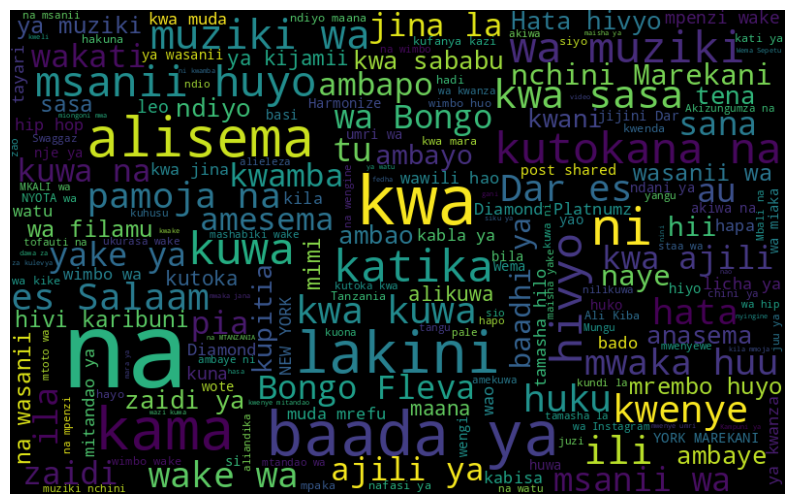

In [ ]:
# wordcloud for category Burudani
subset=train_df_copy[train_df_copy.category=="burudani"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: Bongo Fleva, msanii, filamu, Diamond Platnumz etc.

##### Wordcloud for category 'Afya'

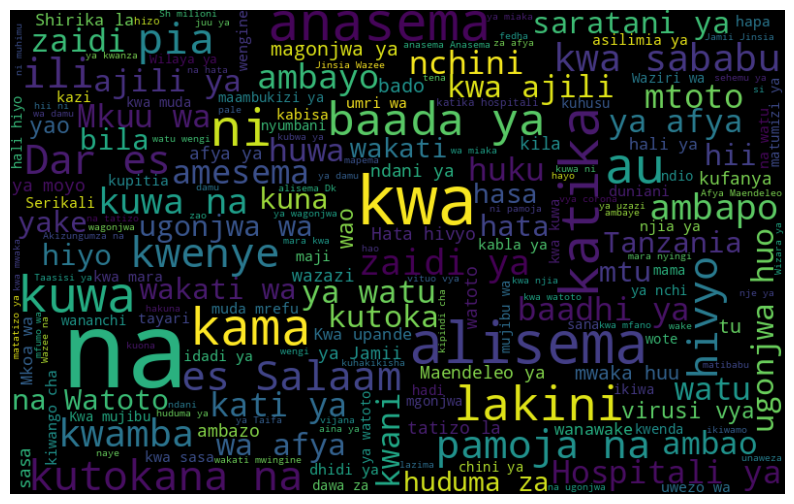

In [ ]:
# wordcloud for category Afya
subset=train_df_copy[train_df_copy.category=="afya"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: afya, hospitali, ugonjwa, saratani etc.

## Bivariate analysis

#### **Average Word Count by Category**

In [ ]:
df_grouped = train_df_copy.groupby('category', as_index=False)['word_count'].mean()

fig = px.bar(df_grouped, x='category', y='word_count', color='category',
             title='Average Word Count by Category',
             labels={'category': 'Category', 'word_count': 'Average Word Count'},
             barmode='group')
fig.write_image('word_count_by_category.jpg')
fig.show()


This plot shows the average word count by category, which reveals interesting differences between categories:

#### **Insights**:
Higher Average Word Count for "afya" and "kitaifa".The afya category has the highest average word count (~300 words), suggesting that articles in this category are typically longer and more detailed. The average word count is as follows in descending order:

1. Afya ~ 305
2. Kitaifa ~ 262
3. Uchumi ~ 203
4. Kimataifa ~ 196
5. Michezo ~ 186
6. Burudani ~ 150


#### **Average Text Length by Category**

In [ ]:
df_grouped = train_df_copy.groupby('category', as_index=False)['text_length'].mean()

fig = px.bar(df_grouped, x='category', y='text_length', color='category',
             title='Average Text Length by Category',
             labels={'category': 'Category', 'text_length': 'Average Text Length'},
             barmode='group')
fig.write_image('text_length_by_category.jpg')
fig.show()




This plot shows the average text length by category, which reinforces the patterns seen in the word count analysis:

#### Insights:
The afya category has the highest average text length (~1800 characters), indicating that health-related articles tend to be more detailed. Kitaifa also has relatively long texts, which aligns with the detailed nature of national news. Burudani articles have the shortest average text length (~900 characters), consistent with their shorter average word count. The order of text length in descending order is as follows:

1. Afya ~ 1887
2. Kitaifa ~ 1662
3. Uchumi ~ 1307
4. Kimataifa ~ 1242
5. Michezo ~ 1149
6. Burudani ~ 916

## Multivariate Analysis

#### **Text Length vs Word Count by Category**

In [ ]:
fig = px.scatter(train_df_copy, x='text_length', y='word_count', color='category',
                 title='Text Length vs Word Count by Category',
                 labels={'text_length': 'Text Length', 'word_count': 'Word Count'})
fig.write_image('text_length_vs_word_count.jpg')
fig.show()

This scatter plot shows a strong positive correlation between text length and word count across different categories. Here's what it suggests about the data:

#### **Key Insights:**
1. **Linear Relationship**

The almost perfect diagonal alignment indicates that text length and word count increase proportionally — longer texts have more words, which is expected since text length typically reflects character count.

2. **Category Consistency**

The consistent clustering of categories suggests that the relationship between text length and word count holds across different categories — no major outliers by category.

3. **Outliers**

There are a few points (especially at high text lengths) that are slightly off the line — these could be unusual texts with higher or lower word density (e.g., many special characters or formatting differences).

4. **Data Quality**

The clean clustering implies that the data is relatively clean and well-structured, without major inconsistencies across categories.



# Preprocessing

This step involves preparing the clean data for modeling.
1. Creating pipelines for vectorizing the feature and label encoding the target.
2. Calling the train and test, Xand y for use in model training and testing

### Pipelines

#### Preprocessing the Features

Machine learning and deep learning models do deal with texts hence the need to change the text to a format which the models would be able to handle the text. Term Frequency-Inverse Document Frequency Vectorizer converts text data into numerical feature vectors that can be used by machine learning and deep learning models. TF-IDF is useful because:

1. Terms that are unique to a document are given higher weight.

2. Terms that are common across all documents (like "za" or "na") are downweighted.

3. It helps improve the relevance of features for text classification and clustering.1.

In [ ]:
# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ("text_cleaner", SwahiliTextCleaner()),
    ("tfidf", TfidfVectorizer(max_features=5000))  # Convert text to numerical features
])

#### Preprocessing the target

The target being categorical, we need to encode the different classes so that the model can use this format. We use label encoding which  assigns numerical labels to the different classes.

In [ ]:
# Custom function to encode labels
def encode_labels(y):
    le = LabelEncoder()
    return le.fit_transform(y)

# Create label encoding pipeline for target
encoding_pipeline = Pipeline([
    ("label_encoder", FunctionTransformer(encode_labels))
])

In [ ]:
# Apply the pipeline to the target on training and test sets
train_df["category_encoded"] = encoding_pipeline.fit_transform(train_df["category"])
test_df["label_encoded"] = encoding_pipeline.transform(test_df["label"])

In [ ]:
# Apply the pipeline to the 'content' and 'text' column only (of both train and test sets)
X_train  = preprocessing_pipeline.fit_transform(train_df["content"])
X_test= preprocessing_pipeline.transform(test_df["text"])



#### Calling the Target and features for train and test data

In [ ]:
y_train = train_df["category_encoded"]
y_test = test_df["label_encoded"]

In [ ]:
#Convert the sparse matrix to a dense array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Pad sequences after converting to dense arrays
X_train_lstm = pad_sequences(X_train_dense, maxlen=max_length, padding='post')
X_test_lstm = pad_sequences(X_test_dense, maxlen=max_length, padding='post')
X_test_lstm, X_val_lstm, y_test, y_val = train_test_split(
    X_test_lstm_1, y_test,
    test_size=0.30,
    random_state=42,
    stratify=y_test
)

In [ ]:
X_train_bert = train_df_copy['content']
X_test_bert1 = test_df['text']
X_test_bert, X_val_bert, y_test, y_val = train_test_split(
    X_test_bert1 , y_test,
    test_size=0.30,
    random_state=42,
    stratify = y_test
)


# Modeling

Modeling is a crucial phase in any data science project, where the goal is to develop a mathematical or computational representation of the underlying patterns within the data. This phase involves selecting the appropriate algorithms, training the models, and evaluating their performance to ensure they generalize well to unseen data.

### **Why is Modeling Important?**
1. Prediction and Inference: Models help in predicting future outcomes and inferring relationships within the data.
2. Decision-Making: Accurate models support data-driven decisions.
32. Optimization: Models can be used to optimize processes or outcomes.

## Machine learning
Machine Learning (ML) is a branch of Artificial Intelligence (AI) that enables computers to learn from data and improve their performance over time without being explicitly programmed. In ML, algorithms identify patterns in data, make predictions, and adapt to new information.

### How It Works in Our Project
1. Data Collection: Gather relevant data from reliable sources.

2. Data Preprocessing: Clean, transform, and structure the data for analysis.

3. Model Selection: Choose the appropriate ML algorithm (e.g., regression, classification, clustering).

4. Training and Evaluation: Train the model on a training dataset and evaluate its performance on a test dataset.

5. Prediction and Optimization: Use the trained model to make predictions and fine-tune it for better accuracy.

### Importance in the Project
It enables us to automate decision-making, leading to increased efficiency and accuracy.

### Steps
1. Model Initialization

A TextClassifier object is created with a fixed random state (random_state=42) to ensure reproducibility.

2. Adding Models

The add_default_models() function adds default classification models (likely models like Naive Bayes, Logistic Regression, Linear SVM, etc.).

3. Training

The train_all_models() function trains all the added models using the training data (X_train, y_train).

handle_imbalance=True - the training process includes strategies to address class imbalance (e.g., class weighting or resampling).

4. Evaluation

The evaluate_all_models() function evaluates the trained models on the test data (X_test, y_test).

The results object stores the evaluation metrics.

5. Output Results

The evaluation results are printed, which likely include metrics such as accuracy, precision, recall, and F1-score for each model.

### Step 1: Train & Evaluate Base Models

In [ ]:
classifier = TextClassifier(random_state=42)

In [ ]:
classifier.add_default_models()

In [ ]:
classifier.train_all_models(X_train, y_train, handle_imbalance=True)

Training Naive Bayes...
Training Logistic Regression...
Training Linear SVM...


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Random Forest...
Training Neural Network...


{'Naive Bayes': MultinomialNB(),
 'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'Linear SVM': LinearSVC(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)}

In [ ]:
results = classifier.evaluate_all_models(X_test, y_test,)
print(results)

Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating Linear SVM...
Evaluating Random Forest...
Evaluating Neural Network...

Best model: Logistic Regression with F1 score: 0.7798
{'Naive Bayes': {'accuracy': 0.8206595802671027, 'f1_score': 0.7487727361122886, 'predictions': array([3, 4, 4, ..., 4, 3, 4]), 'classification_report': {'0': {'precision': 0.3017543859649123, 'recall': 0.7853881278538812, 'f1-score': 0.43599493029150826, 'support': 219.0}, '1': {'precision': 0.8337628865979382, 'recall': 0.9203413940256046, 'f1-score': 0.8749154834347532, 'support': 703.0}, '2': {'precision': 0.8198198198198198, 'recall': 0.9024793388429752, 'f1-score': 0.8591660110149488, 'support': 605.0}, '3': {'precision': 0.8861731843575419, 'recall': 0.7580645161290323, 'f1-score': 0.8171281390856407, 'support': 3348.0}, '4': {'precision': 0.9727564102564102, 'recall': 0.9123246492985972, 'f1-score': 0.9415718717683558, 'support': 1996.0}, '5': {'precision': 0.5050847457627119, 'recall

In [ ]:
print(f"Best model: {classifier.best_model_name} with F1 score: {classifier.best_score:.4f}")

Best model: Logistic Regression with F1 score: 0.7798


### Step 2: Evaluate Using Confusion Matrix & Learning Curves

In [ ]:
classifier.set_category_names(["Kitaifa",
"Michezo",
"Burudani",
"Uchumi",
"Kimataifa",
"Afya"     ])

#### 1. Naive Bayes

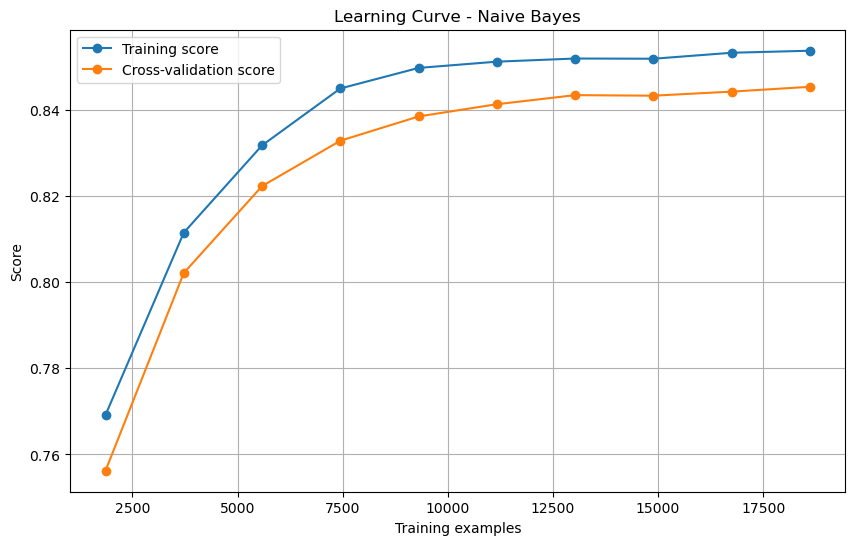

In [ ]:
classifier.plot_learning_curve("Naive Bayes", X=X_train, y=y_train)

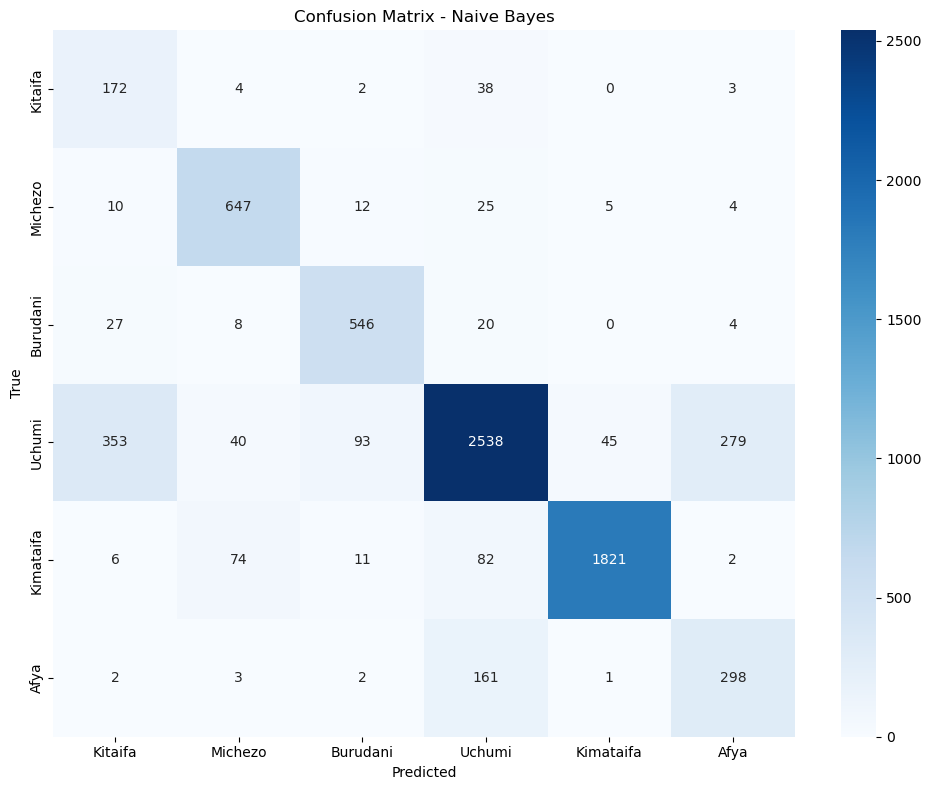

In [ ]:
classifier.plot_confusion_matrix("Naive Bayes", results=results)

##### Interpretation
Accuracy: 85%

Macro F1 Score: 83%

Confusion Matrix:

Higher diagonal values = Better classification performance

#### 2. Logistics Regression

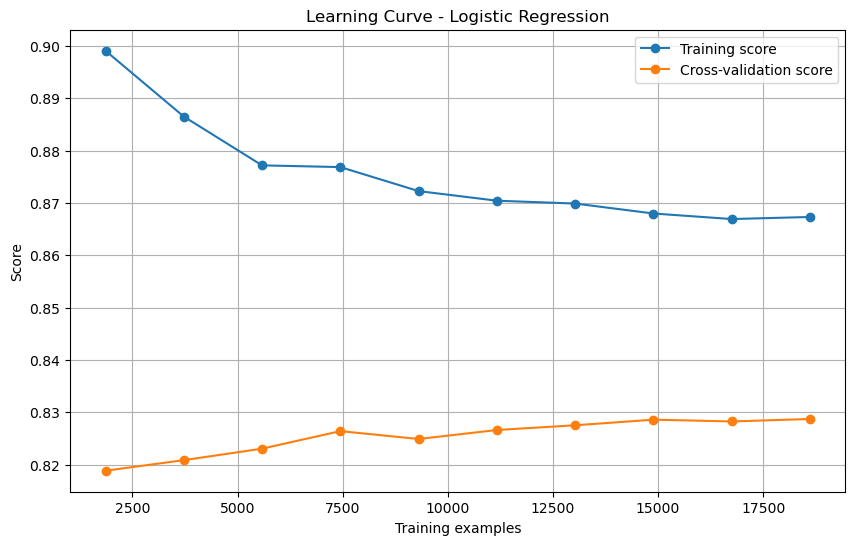

In [ ]:
classifier.plot_learning_curve("Logistic Regression", X=X_train, y=y_train)

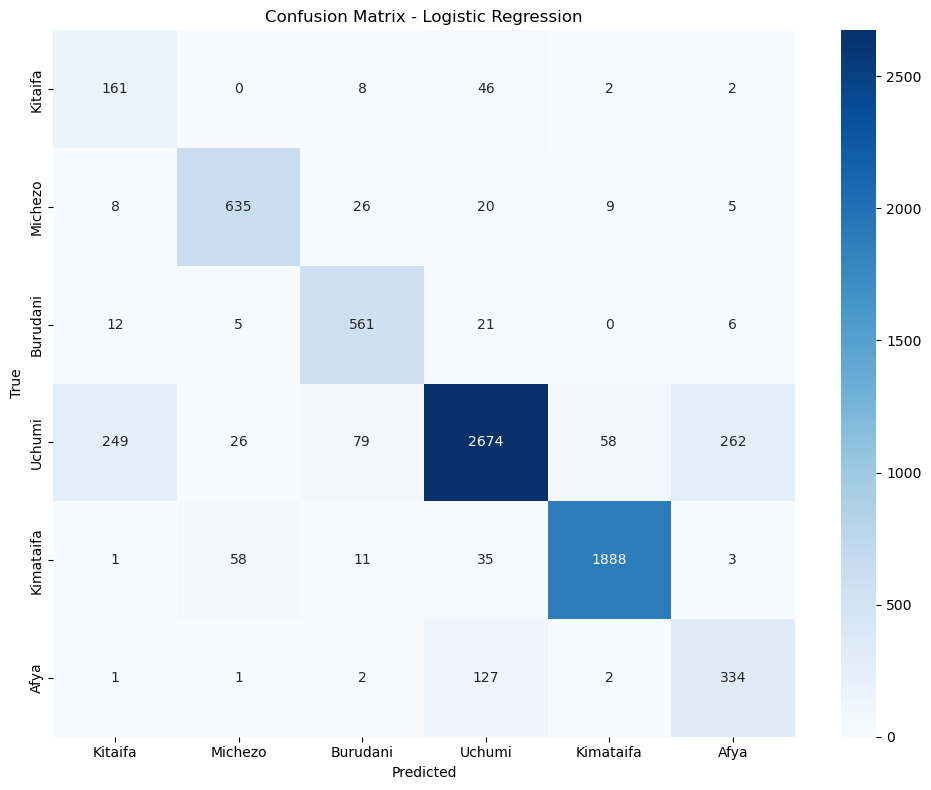

In [ ]:
classifier.plot_confusion_matrix('Logistic Regression', results=results)

##### Interpretation
....

#### 3. Linear Support Vector Classification

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: Futu

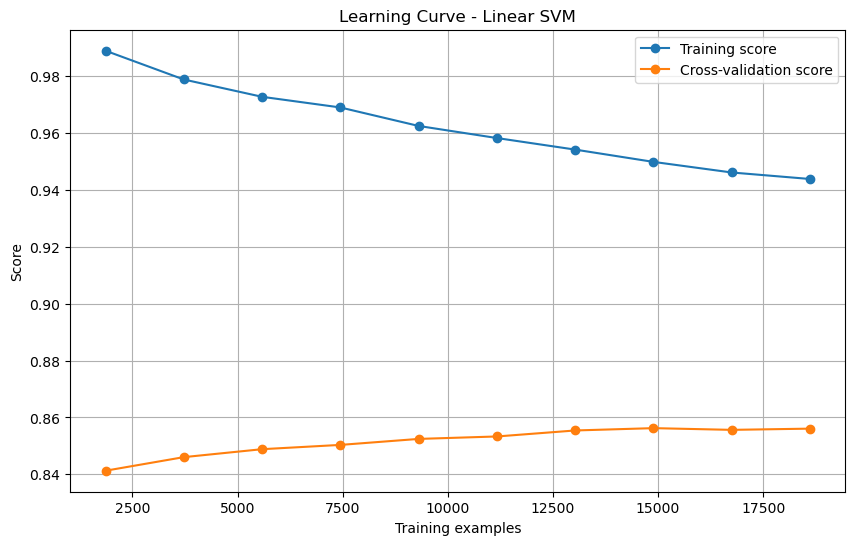

In [ ]:
classifier.plot_learning_curve("Linear SVM", X=X_train, y=y_train)

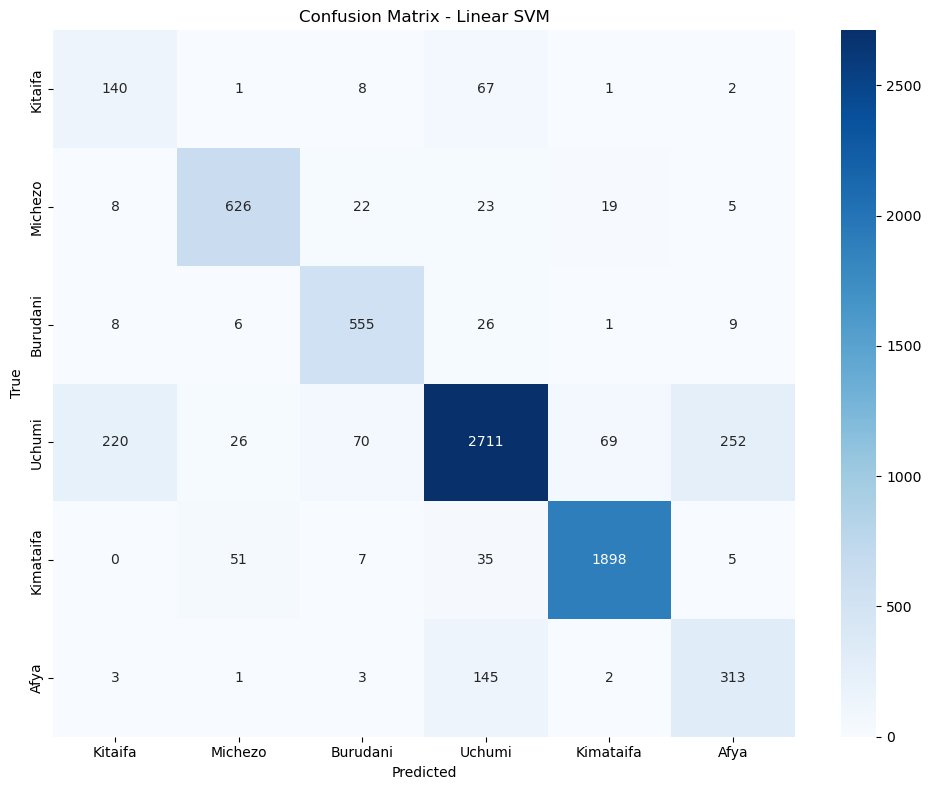

In [ ]:
classifier.plot_confusion_matrix("Linear SVM", results)

##### Interpretation
....

#### 4. Random Forest

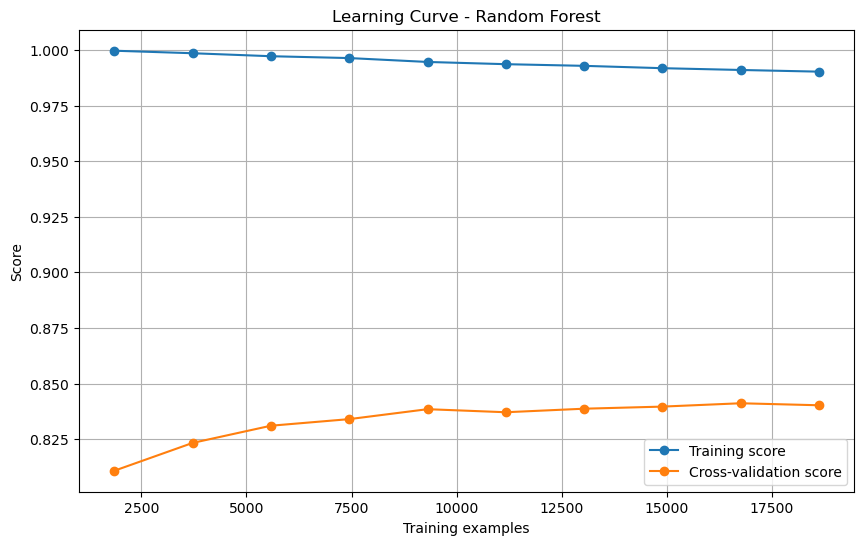

In [ ]:
classifier.plot_learning_curve("Random Forest", X_train, y_train)

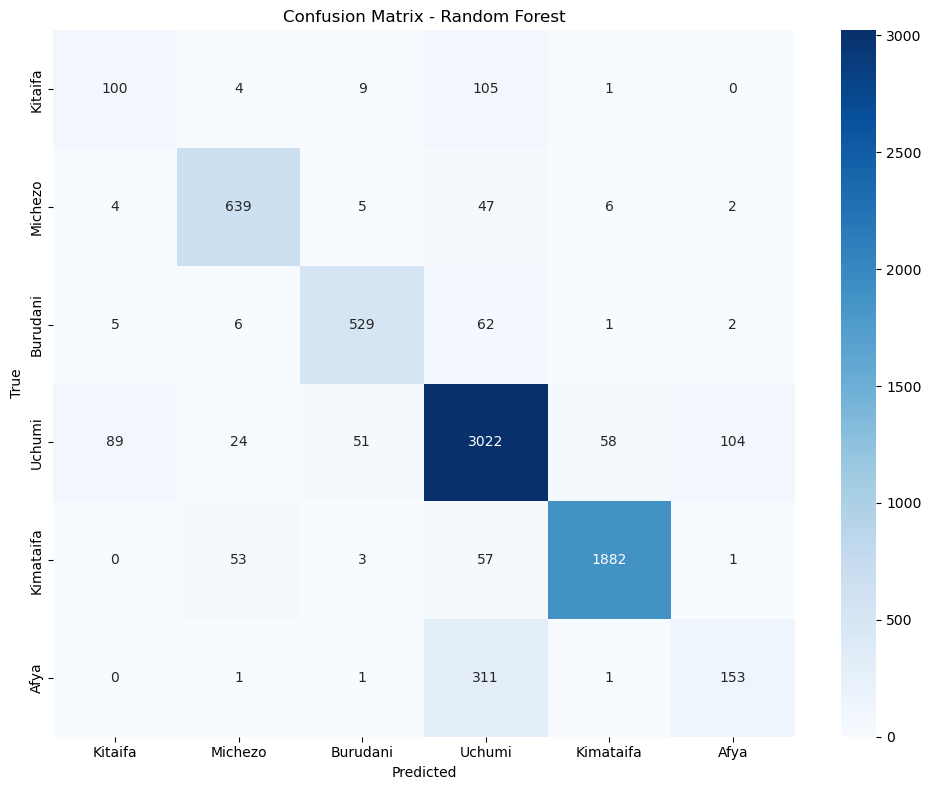

In [ ]:
classifier.plot_confusion_matrix("Random Forest", results)

##### Interpretation
....

#### 5. Neural Network

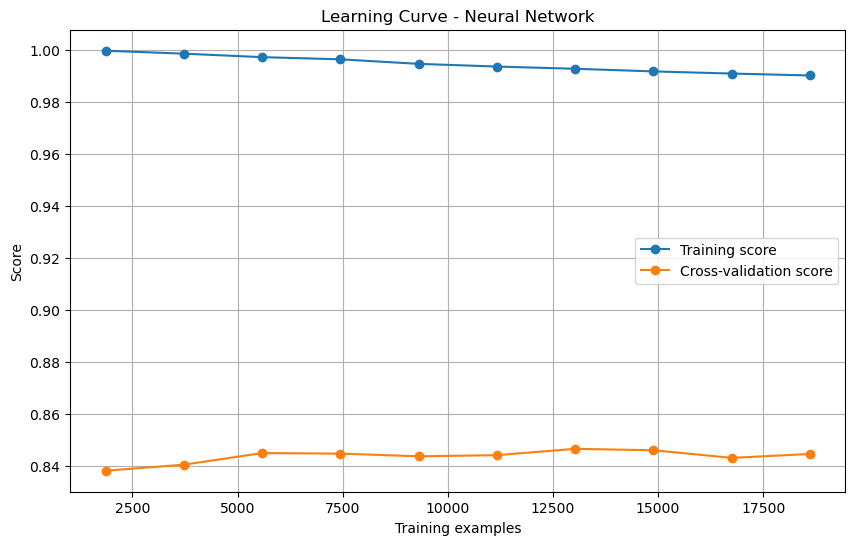

In [ ]:
classifier.plot_learning_curve("Neural Network", X=X_train, y=y_train)

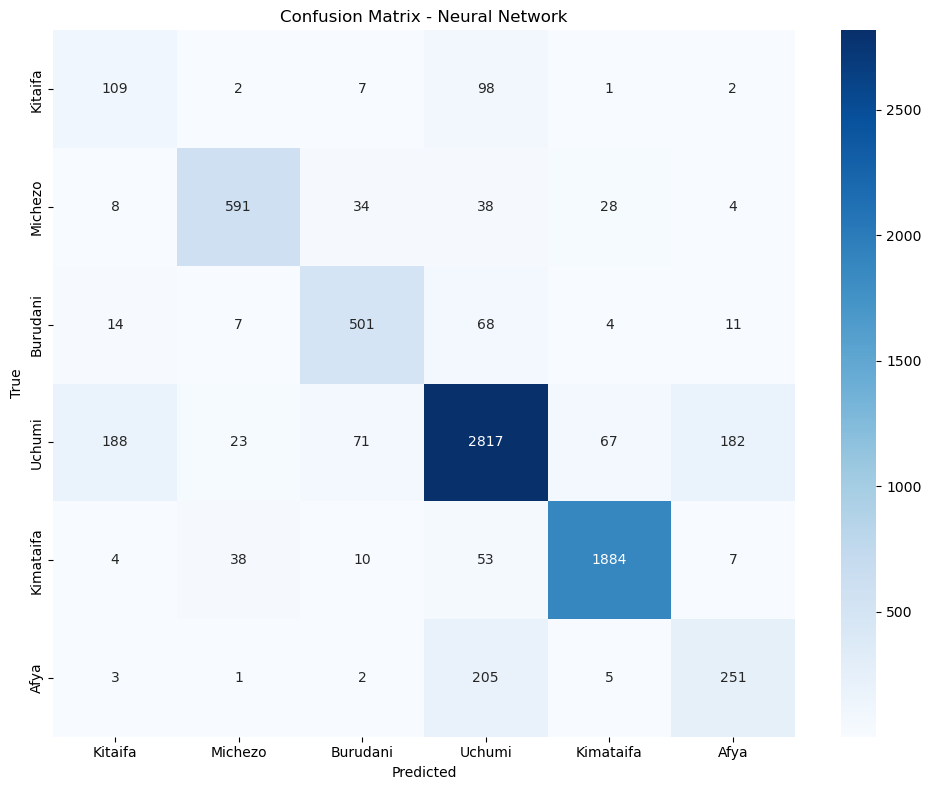

In [ ]:
classifier.plot_confusion_matrix("Neural Network", results=results)

##### Interpretation
....

### Step 3: Apply SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000)  # Adjust based on explained variance
X_reduced = svd.fit_transform(X_train)


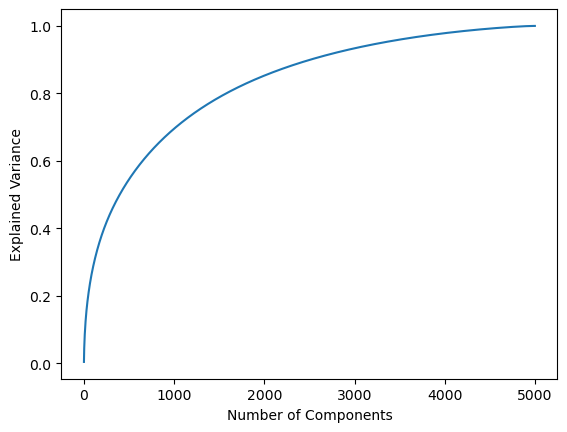

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance = np.cumsum(svd.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: Futu

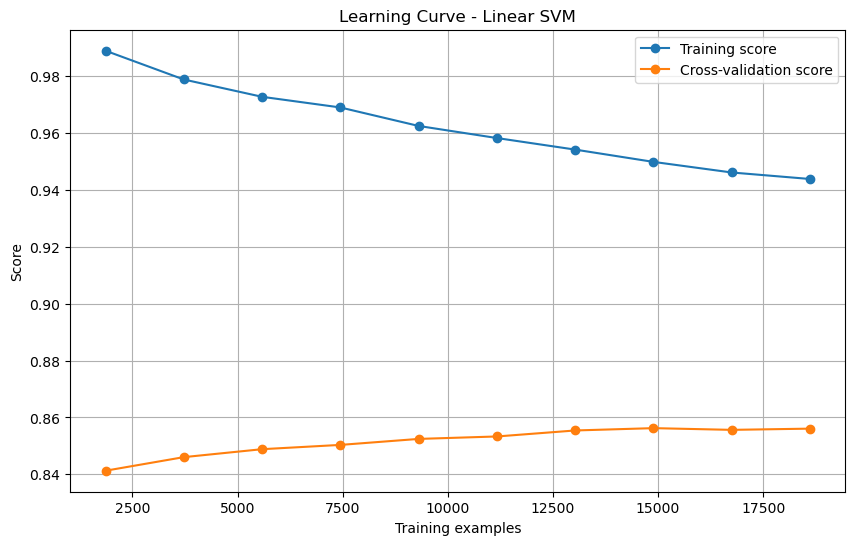

In [ ]:
classifier.plot_learning_curve("Linear SVM", X=X_reduced, y=y_train)

#### So What...
Our data doesn't allow us to apply PCA and we are instead try SVD which did nothing of any significance for our data.

### Step 4: Hyperparameter Tuning them

#### 1. Naive Bayes

In [ ]:
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0]}

In [ ]:
best_nb = classifier.tune_hyperparameters("Naive Bayes", param_grid_nb, X_train, y_train, cv=5, scoring='f1_macro')


Best parameters for Naive Bayes: {'alpha': 0.1}
Best f1_macro score: 0.7717


#### 2. Logistics Regression

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

In [ ]:
best_lr = classifier.tune_hyperparameters("Logistic Regression", param_grid_lr, X_train, y_train, cv=5, scoring='f1_macro')


Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best f1_macro score: 0.7956


#### 3. Linear SVM

In [ ]:
param_grid_svc = {'C': [0.01, 0.1, 1, 10, 100]}

In [ ]:
best_svc = classifier.tune_hyperparameters("Linear SVM", param_grid_svc, X_train, y_train, cv=5, scoring='f1_macro')


Best parameters for Linear SVM: {'C': 0.1}
Best f1_macro score: 0.7995


#### Retraining and Evaluating

In [ ]:
if "Random Forest" in classifier.models:
    del classifier.models["Random Forest"]
if "Neural Network" in classifier.models:
    del classifier.models["Neural Network"]

print("Current models:", list(classifier.models.keys()))

Current models: ['Naive Bayes', 'Logistic Regression', 'Linear SVM']


In [ ]:
classifier.train_all_models(X_train, y_train, handle_imbalance=True)

Training Naive Bayes...
Training Logistic Regression...
Training Linear SVM...


{'Naive Bayes': MultinomialNB(alpha=0.1),
 'Logistic Regression': LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42,
                    solver='liblinear'),
 'Linear SVM': LinearSVC(C=0.1, class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)}

In [ ]:
results = classifier.evaluate_all_models(X_test, y_test, detailed=True)

Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating Linear SVM...
Evaluating Random Forest...
Evaluating Neural Network...

Best model: Logistic Regression with F1 score: 0.7773



Model: Naive Bayes
Accuracy: 0.8257018261106569
Macro F1 Score: 0.7490786961869311
Classification Report: {'Kitaifa': {'precision': 0.31365313653136534, 'recall': 0.776255707762557, 'f1-score': 0.4467805519053876, 'support': 219.0}, 'Michezo': {'precision': 0.8376623376623377, 'recall': 0.9174964438122333, 'f1-score': 0.8757637474541752, 'support': 703.0}, 'Burudani': {'precision': 0.824773413897281, 'recall': 0.9024793388429752, 'f1-score': 0.861878453038674, 'support': 605.0}, 'Uchumi': {'precision': 0.8774410774410775, 'recall': 0.7783751493428913, 'f1-score': 0.8249446027223805, 'support': 3348.0}, 'Kimataifa': {'precision': 0.9722962173681406, 'recall': 0.9143286573146293, 'f1-score': 0.9424218951717015, 'support': 1996.0}, 'Afya': {'precision': 0.5164410058027079, 'recall': 0.5717344753747323, 'f1-score': 0.5426829268292683, 'support': 467.0}, 'accuracy': 0.8257018261106569, 'macro avg': {'precision': 0.7237111981171517, 'recall': 0.8101116287416699, 'f1-score': 0.74907869618693

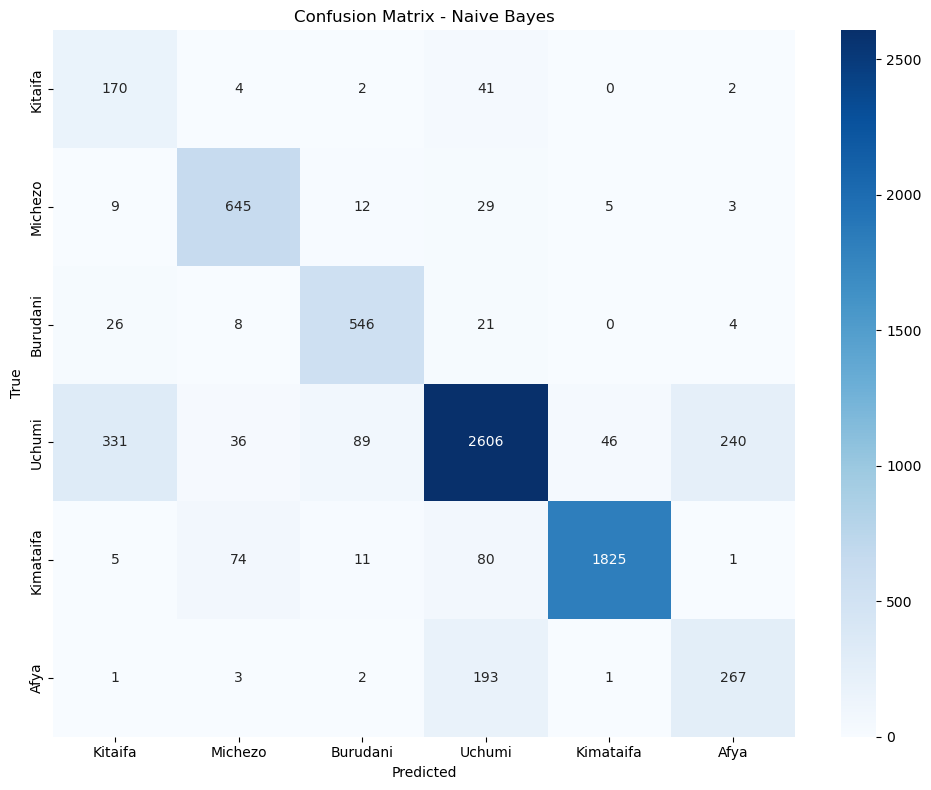


Model: Logistic Regression
Accuracy: 0.8466884709730171
Macro F1 Score: 0.7773437367026318
Classification Report: {'Kitaifa': {'precision': 0.3512396694214876, 'recall': 0.776255707762557, 'f1-score': 0.48364153627311524, 'support': 219.0}, 'Michezo': {'precision': 0.8652291105121294, 'recall': 0.9132290184921764, 'f1-score': 0.8885813148788927, 'support': 703.0}, 'Burudani': {'precision': 0.8245614035087719, 'recall': 0.9322314049586777, 'f1-score': 0.8750969743987588, 'support': 605.0}, 'Uchumi': {'precision': 0.9240056818181818, 'recall': 0.7771804062126643, 'f1-score': 0.8442569759896171, 'support': 3348.0}, 'Kimataifa': {'precision': 0.9652529381706694, 'recall': 0.9463927855711423, 'f1-score': 0.9557298254490261, 'support': 1996.0}, 'Afya': {'precision': 0.5282442748091603, 'recall': 0.7408993576017131, 'f1-score': 0.6167557932263814, 'support': 467.0}, 'accuracy': 0.8466884709730171, 'macro avg': {'precision': 0.7430888463734, 'recall': 0.8476981134331552, 'f1-score': 0.7773437

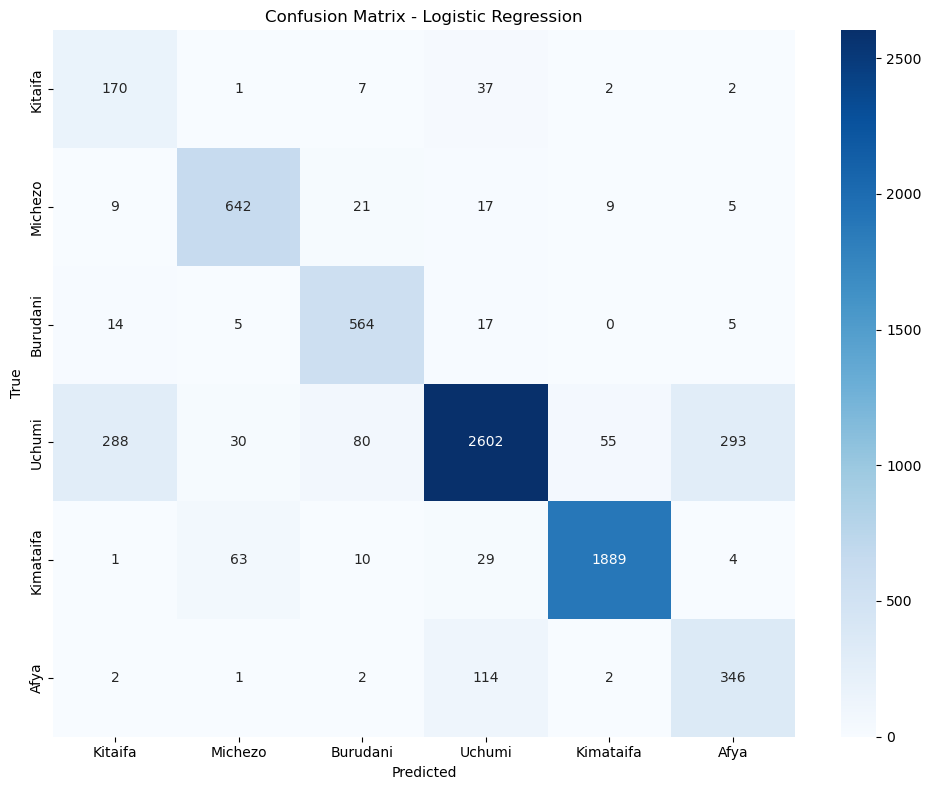


Model: Linear SVM
Accuracy: 0.8458708094848733
Macro F1 Score: 0.7773437269363116
Classification Report: {'Kitaifa': {'precision': 0.3413173652694611, 'recall': 0.7808219178082192, 'f1-score': 0.475, 'support': 219.0}, 'Michezo': {'precision': 0.864, 'recall': 0.9217638691322901, 'f1-score': 0.891947694425327, 'support': 703.0}, 'Burudani': {'precision': 0.827178729689808, 'recall': 0.9256198347107438, 'f1-score': 0.8736349453978159, 'support': 605.0}, 'Uchumi': {'precision': 0.9289834174477289, 'recall': 0.7697132616487455, 'f1-score': 0.8418817379941196, 'support': 3348.0}, 'Kimataifa': {'precision': 0.9673135852911133, 'recall': 0.9488977955911824, 'f1-score': 0.9580171977744056, 'support': 1996.0}, 'Afya': {'precision': 0.5265486725663717, 'recall': 0.7644539614561028, 'f1-score': 0.6235807860262009, 'support': 467.0}, 'accuracy': 0.8458708094848733, 'macro avg': {'precision': 0.7425569617107471, 'recall': 0.8518784400578806, 'f1-score': 0.7773437269363116, 'support': 7338.0}, 'we

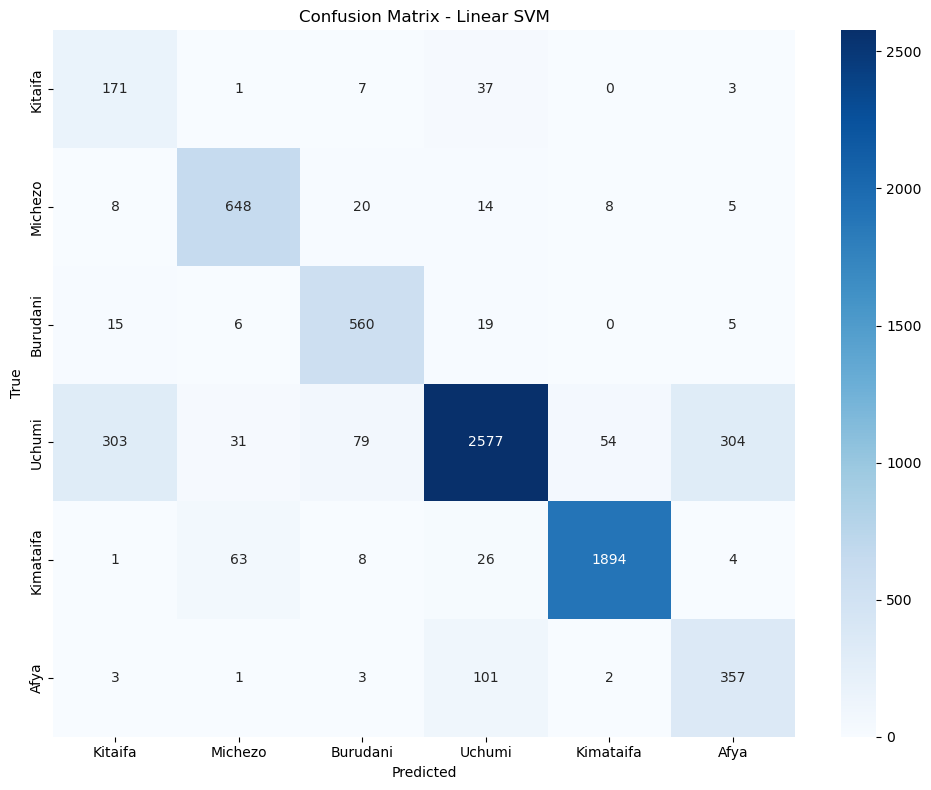


Model: Random Forest
Accuracy: 0.8619514854183701
Macro F1 Score: 0.7493421542453896
Classification Report: {'Kitaifa': {'precision': 0.5050505050505051, 'recall': 0.45662100456621, 'f1-score': 0.47961630695443647, 'support': 219.0}, 'Michezo': {'precision': 0.8789546079779917, 'recall': 0.9089615931721194, 'f1-score': 0.8937062937062937, 'support': 703.0}, 'Burudani': {'precision': 0.8846153846153846, 'recall': 0.8743801652892562, 'f1-score': 0.8794679966749792, 'support': 605.0}, 'Uchumi': {'precision': 0.8385127635960045, 'recall': 0.9026284348864994, 'f1-score': 0.8693901035673187, 'support': 3348.0}, 'Kimataifa': {'precision': 0.965623396613648, 'recall': 0.9428857715430862, 'f1-score': 0.9541191381495564, 'support': 1996.0}, 'Afya': {'precision': 0.583969465648855, 'recall': 0.32762312633832974, 'f1-score': 0.41975308641975306, 'support': 467.0}, 'accuracy': 0.8619514854183701, 'macro avg': {'precision': 0.7761210205837314, 'recall': 0.7355166826325834, 'f1-score': 0.74934215424

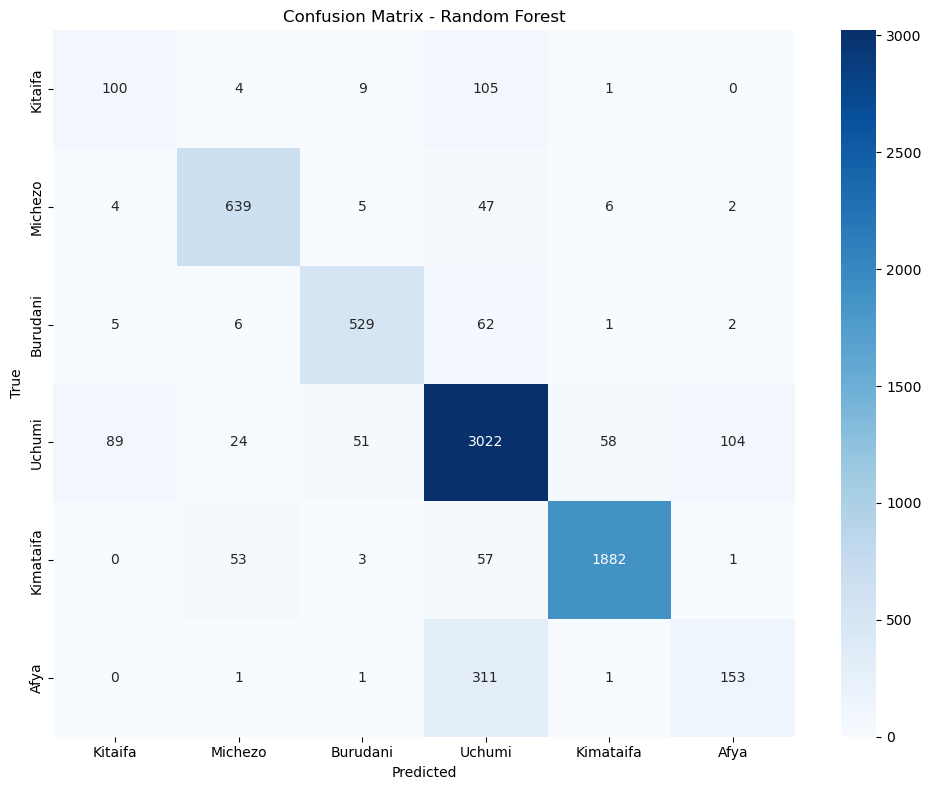


Model: Neural Network
Accuracy: 0.8385118560915781
Macro F1 Score: 0.7365937491729345
Classification Report: {'Kitaifa': {'precision': 0.3343558282208589, 'recall': 0.4977168949771689, 'f1-score': 0.4, 'support': 219.0}, 'Michezo': {'precision': 0.8927492447129909, 'recall': 0.8406827880512091, 'f1-score': 0.865934065934066, 'support': 703.0}, 'Burudani': {'precision': 0.8016, 'recall': 0.828099173553719, 'f1-score': 0.8146341463414634, 'support': 605.0}, 'Uchumi': {'precision': 0.859103385178408, 'recall': 0.8413978494623656, 'f1-score': 0.8501584427342689, 'support': 3348.0}, 'Kimataifa': {'precision': 0.947209653092006, 'recall': 0.9438877755511023, 'f1-score': 0.9455457967377666, 'support': 1996.0}, 'Afya': {'precision': 0.5492341356673961, 'recall': 0.5374732334047109, 'f1-score': 0.5432900432900433, 'support': 467.0}, 'accuracy': 0.8385118560915781, 'macro avg': {'precision': 0.7307087078119432, 'recall': 0.7482096191667126, 'f1-score': 0.7365937491729345, 'support': 7338.0}, 'w

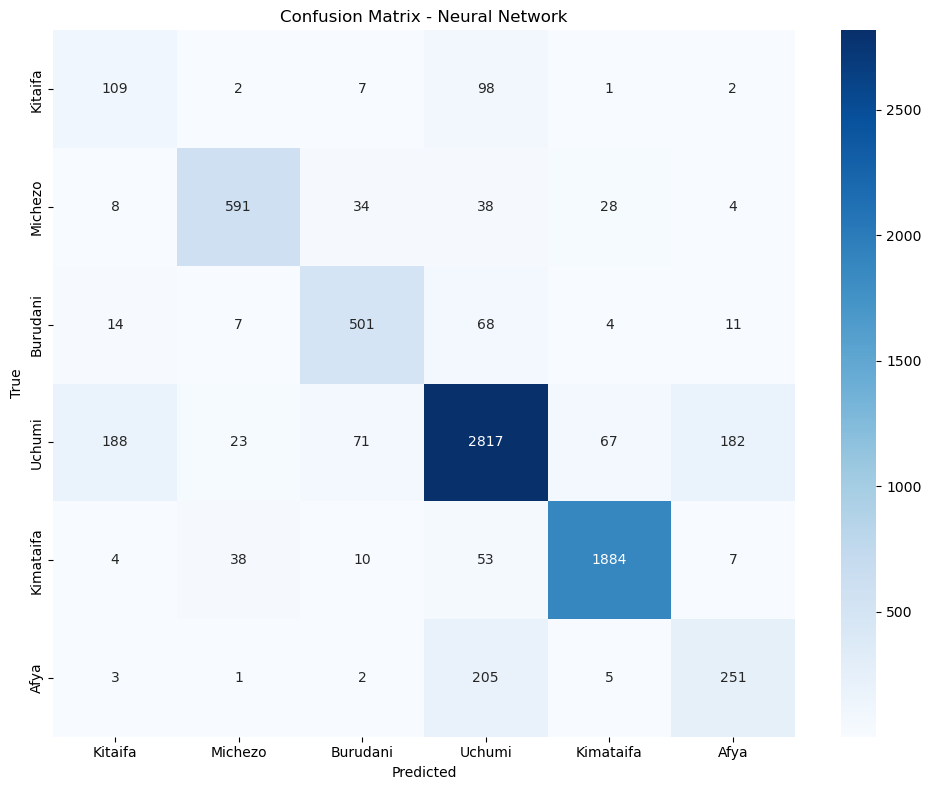

In [ ]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print("Accuracy:", metrics['accuracy'])
    print("Macro F1 Score:", metrics['f1_score'])
    print("Classification Report:", metrics['classification_report'])
    classifier.plot_confusion_matrix(model_name, results=results)

##### Best Model Based on F1-Score
Best Overall Model → Logistic Regression and Linear SVM both have the highest macro F1-score (0.7773).

##### Best for Class-Specific Performance (F1 Score):

1. Kimataifa - Linear SVM (0.9580)

2. Michezo - Random Forest (0.8937)

3. Burudani - Random Forest (0.8795)

4. Uchumi - Random Forest (0.8694)

5. Kitaifa - Logistic Regression (0.4836)

6. Afya - Linear SVM (0.6236)

##### Summary
1. Logistic Regression and Linear SVM are the best-performing models overall due to their high macro F1-scores and balanced class performance.
2. Random Forest offers strong performance in high-frequency classes but struggles with Afya.
3. Neural Network underperforms compared to traditional models, suggesting room for tuning or architectural changes.



Plotting learning curve for Naive Bayes...


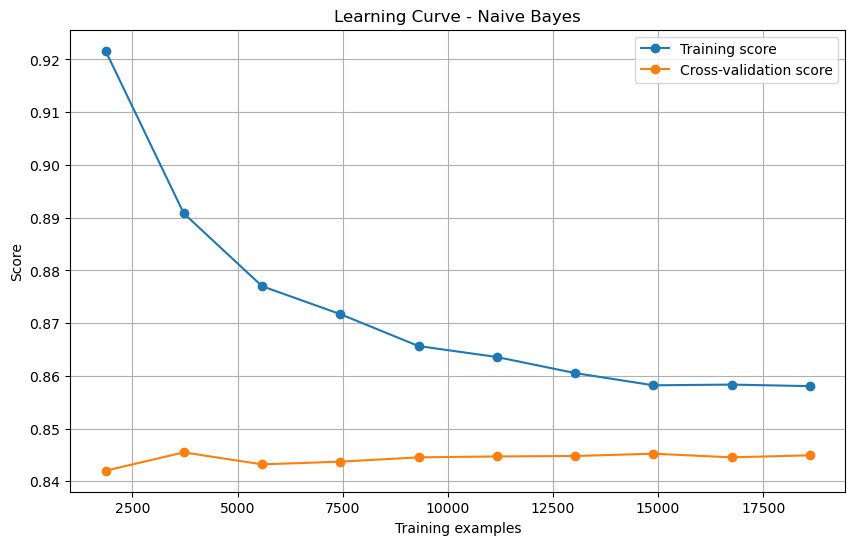


Plotting learning curve for Logistic Regression...


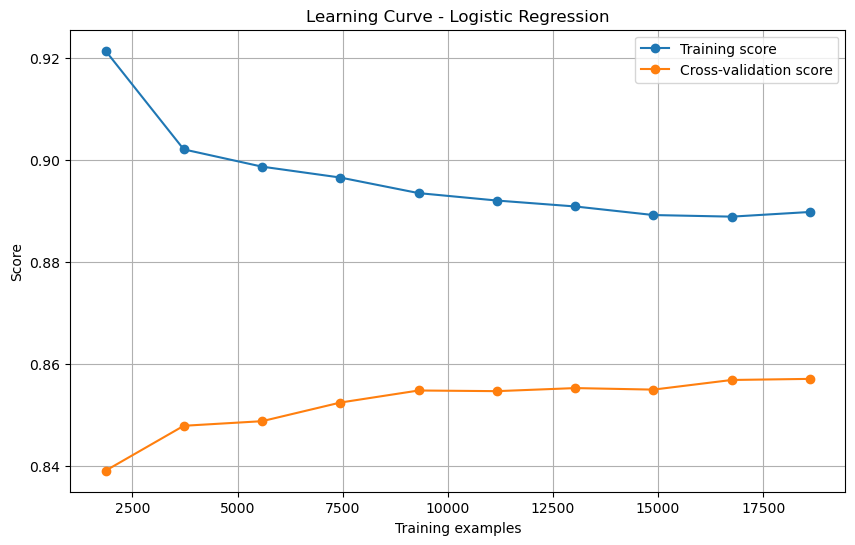


Plotting learning curve for Linear SVM...


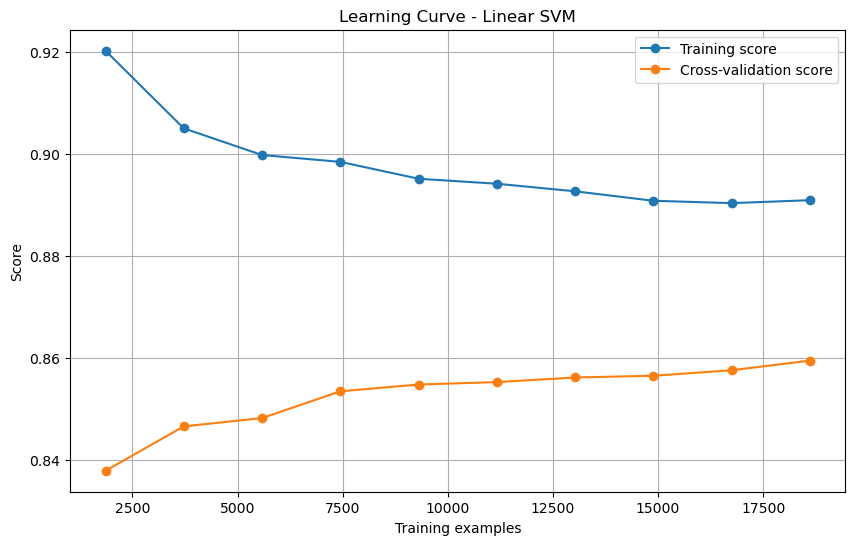

In [ ]:
for model_name in ["Naive Bayes", "Logistic Regression", "Linear SVM"]:
    print(f"\nPlotting learning curve for {model_name}...")
    classifier.plot_learning_curve(model_name, X_train, y_train, cv=5)

#### Loss Insights
Naive Bayes - Overfitting, limited improvement with more data.

Logistic Regression - Balanced performance, benefits from more data.

Linear SVM - Strong generalization, similar behavior to Logistic Regression.

### Step 4: Ensemble them

#### Creating Ensemble

In [ ]:
classifier.create_ensemble(model_names=["Naive Bayes", "Logistic Regression", "Linear SVM"], voting='hard')

#### Train

In [ ]:
classifier.models["Ensemble"].fit(X_train, y_train)
classifier.trained_models["Ensemble"] = classifier.models["Ensemble"]

#### Evaluate

In [ ]:
ensemble_results = classifier.evaluate_model("Ensemble", X_test, y_test, detailed=True)


In [ ]:
print("\n--- Ensemble Evaluation ---")
print("Ensemble Accuracy:", ensemble_results['accuracy'])
print("Ensemble Macro F1 Score:", ensemble_results['f1_score'])
print("Ensemble Classification Report:", ensemble_results['classification_report'])


--- Ensemble Evaluation ---
Ensemble Accuracy: 0.8477786862905424
Ensemble Macro F1 Score: 0.7400857376971853
Ensemble Classification Report: {'Kitaifa': {'precision': 0.41361256544502617, 'recall': 0.7214611872146118, 'f1-score': 0.5257903494176372, 'support': 219.0}, 'Michezo': {'precision': 0.8537549407114624, 'recall': 0.9217638691322901, 'f1-score': 0.8864569083447332, 'support': 703.0}, 'Burudani': {'precision': 0.8458015267175573, 'recall': 0.915702479338843, 'f1-score': 0.8793650793650793, 'support': 605.0}, 'Uchumi': {'precision': 0.841726618705036, 'recall': 0.8736559139784946, 'f1-score': 0.8573941081635644, 'support': 3348.0}, 'Kimataifa': {'precision': 0.9722222222222222, 'recall': 0.9118236472945892, 'f1-score': 0.9410548086866598, 'support': 1996.0}, 'Afya': {'precision': 0.5948717948717949, 'recall': 0.24839400428265523, 'f1-score': 0.3504531722054381, 'support': 467.0}, 'accuracy': 0.8477786862905424, 'macro avg': {'precision': 0.7536649447788498, 'recall': 0.76546685

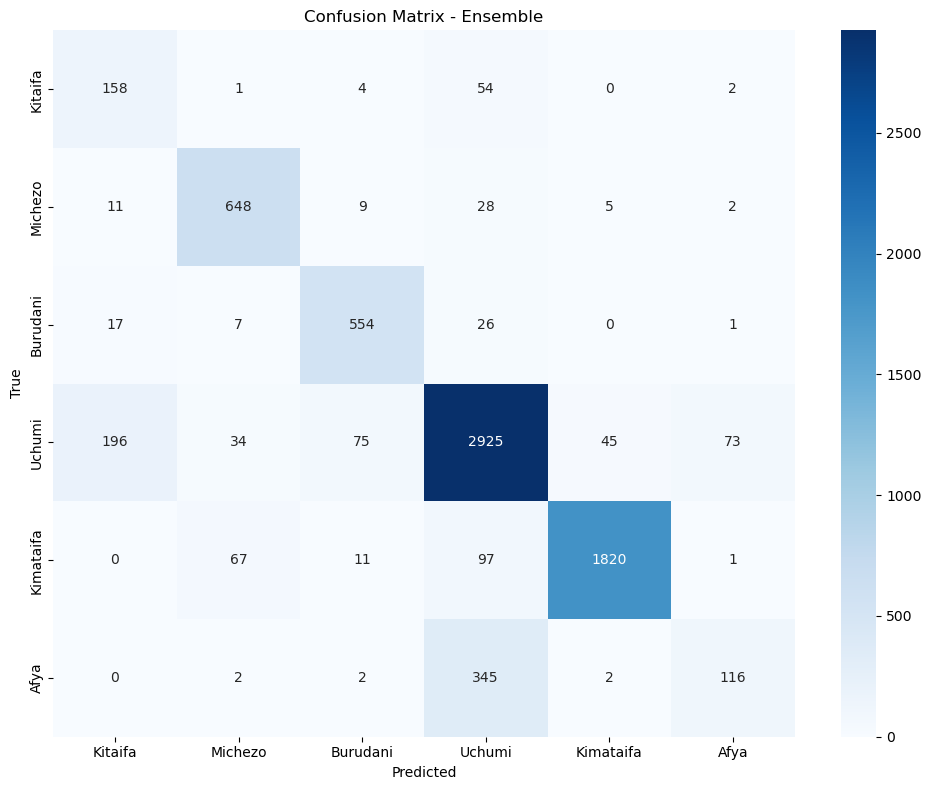

In [ ]:
classifier.plot_confusion_matrix("Ensemble", results={'Ensemble': ensemble_results})

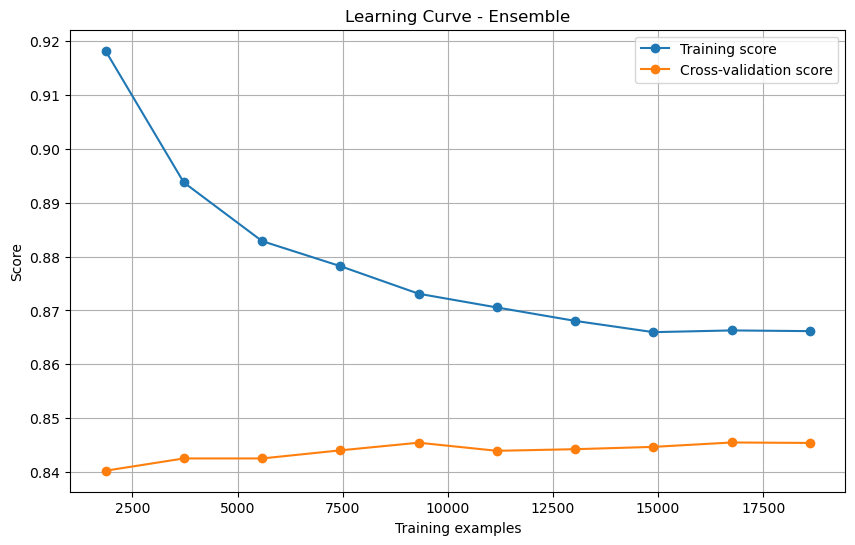

In [ ]:
classifier.plot_learning_curve("Ensemble", X_train, y_train, cv=5)

#### Performance
High accuracy (84.78%) and weighted F1 score (84.26%) indicate the model is doing well overall.

Strong performance for Kimataifa (94.1% F1 score) and Michezo (88.6% F1 score) shows the model is confident in predicting these classes.

Learning Curve Observation: The gap between the training and cross-validation scores is closing but still noticeable. The model might be slightly overfitting to the training set.

### Recommendation for the Next Step

Our models still are overfitting, and considering the high of the data it is best decision to try deep learning as it might be able capture the complexity better

## DEEP LEARNING MODELS

Deep learning is a subfield of machine learning inspired by the structure and function of the human brain. It involves the use of artificial neural networks (ANNs) with multiple layers (hence the term "deep") to learn complex patterns and representations from data. Unlike traditional machine learning algorithms, deep learning models are capable of automatically learning high-level features directly from raw data without the need for manual feature extraction.

### Why Deep Learning?
Traditional machine learning models like logistic regression, decision trees, and support vector machines (SVM) often struggle with large-scale data and complex patterns. Deep learning, on the other hand, excels in these scenarios because of its ability to:

1. Handle large amounts of unstructured data (e.g., text, images, audio).

2. Capture intricate patterns and non-linear relationships.

3. Improve performance with increased data and computational power.

4. Learn hierarchical features (e.g., edges → shapes → objects in an image).

### How Deep Learning Works
Deep learning models are typically composed of layers of artificial neurons, where each neuron applies a mathematical transformation to the input data. The most common architecture for deep learning includes:

1. Input Layer – Takes in the raw data.

2. Hidden Layers – Process data through interconnected neurons, applying activation functions to capture non-linear relationships.

3. Output Layer – Produces predictions based on the learned representations.

The learning process involves adjusting the weights of the connections between neurons using backpropagation and gradient descent to minimize the loss function.

### Relevance to This Project
In this project, we use a Long Short-Term Memory (LSTM) model, which is a specialized form of RNN designed to handle sequential data. LSTMs are particularly well-suited for text-based tasks because they can capture the context and long-term dependencies between words. This makes them highly effective for tasks such as sentiment analysis, text classification, and language modeling.

The model will process the input text data, learn the underlying patterns, and classify the text into predefined categories. By leveraging the power of deep learning, the model aims to achieve higher accuracy and better generalization than traditional machine learning approaches.

### **LSTM Model**

#### **Hyperparameters**
1. embedding_dim – Size of the word embeddings. Each word is represented by a vector of size 64.

2. vocab_size – Number of unique tokens in the tokenizer's vocabulary. This determines the input dimension of the embedding layer.

#### **Model Architecture**
Creates a Sequential model — a linear stack of layers.

##### **Embedding Layer**
1. Converts integer-encoded words into dense vectors of fixed size (embedding_dim).

2. Input size = vocab_size - Number of unique words the model can handle.

3. Output size = embedding_dim - Size of the word vector for each token.

4. input_length = max_length - Maximum length of the input sequence (padded if shorter).

##### **LSTM Layer**
1. Adds an LSTM layer with 128 units (hidden state size).

2. return_sequences=False - Returns only the final hidden state (not the entire sequence).

3. LSTM captures long-term dependencies and context in the text.

##### **Dropout Layer**
1. Applies a dropout rate of 50% to prevent overfitting.

2. Randomly drops 50% of neurons during training.

##### **Dense Layer (Output Layer)**
1.  Dense layer with size equal to the number of unique labels.
2.  activation='softmax' → Outputs probabilities for each class (for multi-class classification).

#### **Compile the Model**
1.   optimizer='adam' → Uses the Adam optimizer for efficient gradient updates.

2.   loss='sparse_categorical_crossentropy' → Suitable for multi-class classification with integer labels.

3. metrics=['accuracy'] → Monitors accuracy during training and evaluation.

In [ ]:
embedding_dim = 64
vocab_size = 10000  # Size of the tokenizer vocabulary

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=False),  # LSTM layer with 128 units
    Dropout(0.5),  # Regularization to avoid overfitting
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for classification
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_classf_model = lstm_model.fit(
    X_train_lstm,
    y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 308s 419ms/step - accuracy: 0.4351 - loss: 1.5065 - val_accuracy: 0.4564 - val_loss: 1.4271
Epoch 2/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 305s 419ms/step - accuracy: 0.4375 - loss: 1.4890 - val_accuracy: 0.4564 - val_loss: 1.4314
Epoch 3/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 302s 415ms/step - accuracy: 0.4430 - loss: 1.4764 - val_accuracy: 0.4564 - val_loss: 1.4276
Epoch 4/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 321s 414ms/step - accuracy: 0.4406 - loss: 1.4746 - val_accuracy: 0.4564 - val_loss: 1.4342
Epoch 5/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 322s 415ms/step - accuracy: 0.4463 - loss: 1.4742 - val_accuracy: 0.4564 - val_loss: 1.4372
Epoch 6/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 305s 419ms/step - accuracy: 0.4389 - loss: 1.4798 - val_accuracy: 0.4564 - val_loss: 1.4275
Epoch 7/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 317s 413ms/step - accuracy: 0.4392 - loss: 1.4822 - val_accuracy: 0.4564 - val_loss: 1.4305
Epoch 8/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 322s 413ms/step - accuracy: 0.4437 -

In [ ]:
results = lstm_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.4551 - loss: 1.4276
Test Loss: 1.4286
Test Accuracy: 0.4562


In [ ]:
def plot_confusion_matrix(model, X_test_lstm, y_test, title):
    y_pred = np.argmax(model.predict(X_test_lstm), axis=-1)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


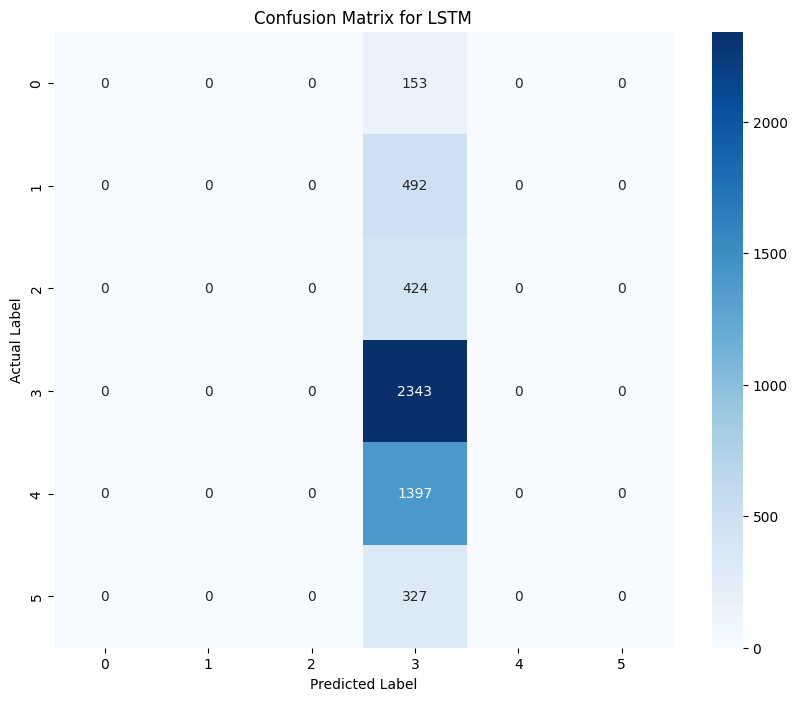

In [ ]:
# For LSTM model
plot_confusion_matrix(lstm_model, X_test_lstm, y_test, 'LSTM')

### **Model observations and next steps**
#### **Learning Curve Trends**
1. Training Loss: Gradually decreasing, indicating that the model is learning.

2. Validation Loss: Remained almost flat, suggesting poor generalization.

3. Training Accuracy: Increased slowly but still low, showing that the model struggles to capture complex patterns.

4. Validation Accuracy: Stayed fixed around 45.64% across epochs — a sign of underfitting.

#### Observations & Issues
1. Model is learning slowly.
2. No sign of overfitting (training and validation performance are closely aligned).
3. Validation accuracy stagnating at around 45% suggests the model is underfitting.
#### The problem could be due to:

1. Insufficient complexity in the model.

2. Learning rate might be too high or too low.

3. Training data imbalance or not enough data.

#### Recommendations for Improvement
Increase Model Complexity: Increase the number of LSTM units or the number of dense layers.


### **Tuned LSTM**

In [ ]:
lstm_model_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
lstm_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

lstm_model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm_classf_model_2 = lstm_model_2.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 468s 634ms/step - accuracy: 0.4339 - loss: 1.5122 - val_accuracy: 0.4564 - val_loss: 1.4278 - learning_rate: 0.0010
Epoch 2/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 491s 618ms/step - accuracy: 0.4360 - loss: 1.4901 - val_accuracy: 0.4564 - val_loss: 1.4267 - learning_rate: 0.0010
Epoch 3/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 495s 609ms/step - accuracy: 0.4433 - loss: 1.4814 - val_accuracy: 0.4564 - val_loss: 1.4262 - learning_rate: 0.0010
Epoch 4/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 491s 593ms/step - accuracy: 0.4395 - loss: 1.4819 - val_accuracy: 0.4564 - val_loss: 1.4291 - learning_rate: 0.0010
Epoch 5/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 429s 589ms/step - accuracy: 0.4365 - loss: 1.4831 - val_accuracy: 0.4564 - val_loss: 1.4287 - learning_rate: 0.0010
Epoch 6/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 443s 590ms/step - accuracy: 0.4417 - loss: 1.4782 - val_accuracy: 0.4564 - val_loss: 1.4273 - learning_rate: 5.0000e-04


In [ ]:
results = lstm_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.4551 - loss: 1.4276
Test Loss: 1.4286
Test Accuracy: 0.4562


161/161 ━━━━━━━━━━━━━━━━━━━━ 30s 180ms/step


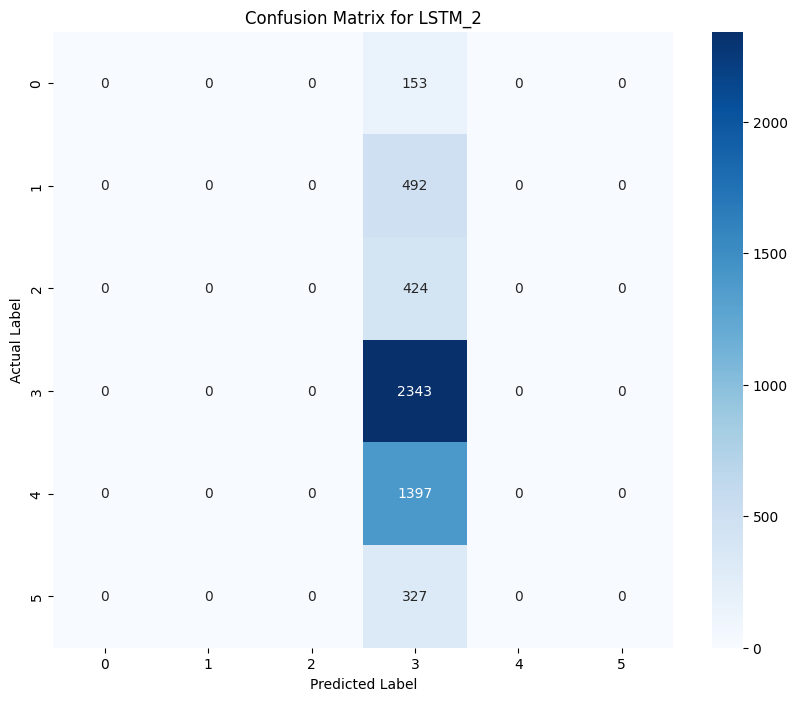

In [ ]:
# For LSTM_2 model
plot_confusion_matrix(lstm_model_2, X_test_lstm, y_test, 'LSTM_2')

#### Observation
1. Accuracy and Loss:
 Test Accuracy = 45.62% Moderate but not great—indicates the model is learning but struggling with certain patterns.
 Test Loss = 1.4286  Relatively high, suggesting poor class separation or overfitting/underfitting issues.

2. Confusion Matrix Issues-
Severe class imbalance as all predictions are concentrated on label 3.
The model predicts class 3 for almost every input, meaning it has likely learned to bias towards the dominant class.

3. Misclassifications across all other classes are very high - Indicates that the model struggles with distinguishing between classes.

We cannot tune this model further as it does not promise yielding any better performance

### **BiLSTM model**

A Bidirectional Long Short-Term Memory (BiLSTM) model is an extension of the traditional LSTM model. The key difference is that a BiLSTM processes information in both forward and backward directions, which allows it to capture context from both past and future states in a sequence.

In [ ]:
# Hyperparameters
embedding_dim = 64
vocab_size = 10000
max_length = 100

# Build the BiLSTM model
bilstm_model = tf.keras.Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),  # Embedding layer
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))),  # Bidirectional LSTM
    BatchNormalization(),  # Normalize activations
    Dropout(0.5),  # Dropout for regularization
    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)),  # LSTM layer
    Dropout(0.5),  # More regularization
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Fully connected layer
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0)
bilstm_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the BiLSTM model
bilstm_model.summary()

# Train the BiLSTM model
bilstm_classf_model= bilstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=10,
    batch_size=32
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 326s 433ms/step - accuracy: 0.4031 - loss: 3.4775 - val_accuracy: 0.4564 - val_loss: 1.5353
Epoch 2/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 332s 447ms/step - accuracy: 0.4385 - loss: 1.5671 - val_accuracy: 0.4564 - val_loss: 1.4441
Epoch 3/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 368s 428ms/step - accuracy: 0.4475 - loss: 1.4866 - val_accuracy: 0.4564 - val_loss: 1.4315
Epoch 4/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 320s 424ms/step - accuracy: 0.4408 - loss: 1.4857 - val_accuracy: 0.4564 - val_loss: 1.4314
Epoch 5/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 309s 425ms/step - accuracy: 0.4439 - loss: 1.4796 - val_accuracy: 0.4564 - val_loss: 1.4319
Epoch 6/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 323s 426ms/step - accuracy: 0.4419 - loss: 1.4790 - val_accuracy: 0.4564 - val_loss: 1.4273
Epoch 7/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 311s 410ms/step - accuracy: 0.4314 - loss: 1.4866 - val_accuracy: 0.4564 - val_loss: 1.4289
Epoch 8/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 307s 390ms/step - accuracy: 0.4418 -

#### Observation:

1. Stagnant Validation Accuracy:
The validation accuracy is stuck at 0.4564 from epoch 2 onward. This indicates that the model is not learning meaningful patterns beyond a certain point.


2. The training loss drops slowly but validation loss remains flat after epoch This suggests that the model is struggling to generalize to the validation set.

3. Low Accuracy Overall:
Training accuracy plateaued at ~44% and validation accuracy at 45.64% → This is low for most classification tasks. Suggests that the model is failing to capture deeper semantic patterns in the data.

### BERT Model

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based deep learning model designed for natural language processing (NLP) tasks. It was introduced by Google AI in 2018 and quickly became the state-of-the-art for a wide range of NLP tasks.

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(np.unique(y_train)))

train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=100, return_tensors="tf")
val_encodings = tokenizer(list(X_val_bert), truncation=True, padding=True, max_length=100, return_tensors="tf")

# Train the model
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)
bert_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


bert_clasf_model = bert_model.fit(
    train_encodings.input_ids, y_train,
    validation_data=(val_encodings.input_ids, y_val),
    epochs=3,
    batch_size=16
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1455/1455 [==============================] - 565s 371ms/step - loss: 1.6983 - accuracy: 0.5459 - val_loss: 1.7892 - val_accuracy: 0.1285
Epoch 2/3
1455/1455 [==============================] - 506s 348ms/step - loss: 1.7919 - accuracy: 0.1885 - val_loss: 1.7918 - val_accuracy: 0.0300
Epoch 3/3
1455/1455 [==============================] - 506s 348ms/step - loss: 1.7917 - accuracy: 0.0676 - val_loss: 1.7918 - val_accuracy: 0.0300


In [ ]:
# Tokenize the test set
test_encodings = tokenizer(
    list(X_test_bert),
    truncation=True,
    padding=True,
    max_length=100,
    return_tensors="tf"
)

# Create test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask'],
        'token_type_ids': test_encodings['token_type_ids']
    },
    y_test
)).batch(16)

# Compile the model again before evaluation
bert_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate on the test set
test_loss, test_accuracy = bert_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

321/321 [==============================] - 40s 109ms/step - loss: 4.4631 - accuracy: 0.2720
Test Loss: 4.4631
Test Accuracy: 0.2720


In [ ]:
# Get predictions on the test dataset
y_pred = bert_model.predict(test_dataset).logits
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Compute F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # 'weighted' for multiclass
print(f"F1 Score: {f1:.4f}")

321/321 [==============================] - 36s 112ms/step
F1 Score: 0.1167


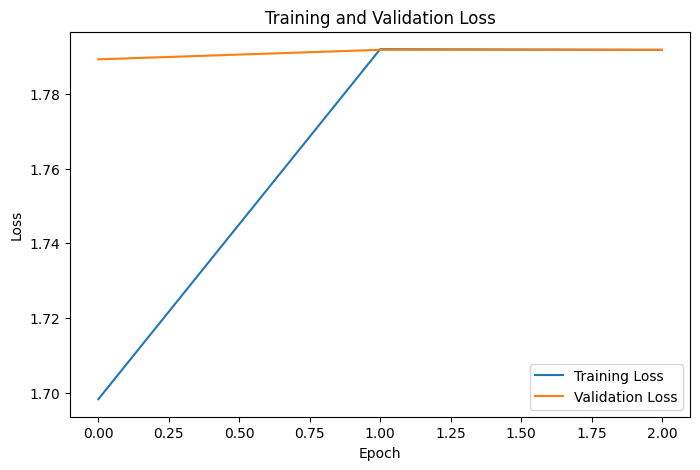

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(bert_clasf_model.history['loss'], label='Training Loss')
plt.plot(bert_clasf_model.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

### **Fine-Tuned BERT-base-uncased for Sequence Classification**
The "bert-base-uncased" model is a pre-trained version of BERT with the following specifications:

1. Base model – 12 transformer layers, 768 hidden dimensions, 12 attention heads

2. Uncased – All input text is converted to lowercase and case information is removed

3. Pre-trained tasks:

  1. Masked Language Modeling (MLM) – Predict missing words in a sentence

  2. Next Sentence Prediction (NSP) – Determine if two sentences logically follow each other

Fine-tuning involves taking this pre-trained model and training it further on a specific downstream task in this case, sequence classification.

In [ ]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Define the model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y_train)))

# Define learning rate scheduler
batch_size = 32
num_train_steps = len(train_encodings.input_ids) // batch_size * 3  # 3 epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.01
)

# Compile model with the optimizer
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = bert_model.fit(
    dict(train_encodings),
    y_train,
    validation_data=(dict(val_encodings), y_val),
    epochs=3,
    batch_size=batch_size
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
728/728 [==============================] - 335s 433ms/step - loss: 0.7704 - accuracy: 0.7510 - val_loss: 0.4451 - val_accuracy: 0.8610
Epoch 2/3
728/728 [==============================] - 324s 445ms/step - loss: 0.3943 - accuracy: 0.8822 - val_loss: 0.3819 - val_accuracy: 0.8792
Epoch 3/3
728/728 [==============================] - 324s 445ms/step - loss: 0.3168 - accuracy: 0.9037 - val_loss: 0.3595 - val_accuracy: 0.8878


In [ ]:
# Predict on the test data
y_pred = bert_model.predict(dict(test_encodings)).logits
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Compute accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # Use 'micro' or 'macro' depending on task

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

161/161 [==============================] - 33s 202ms/step
Accuracy: 0.8941
F1 Score: 0.8934


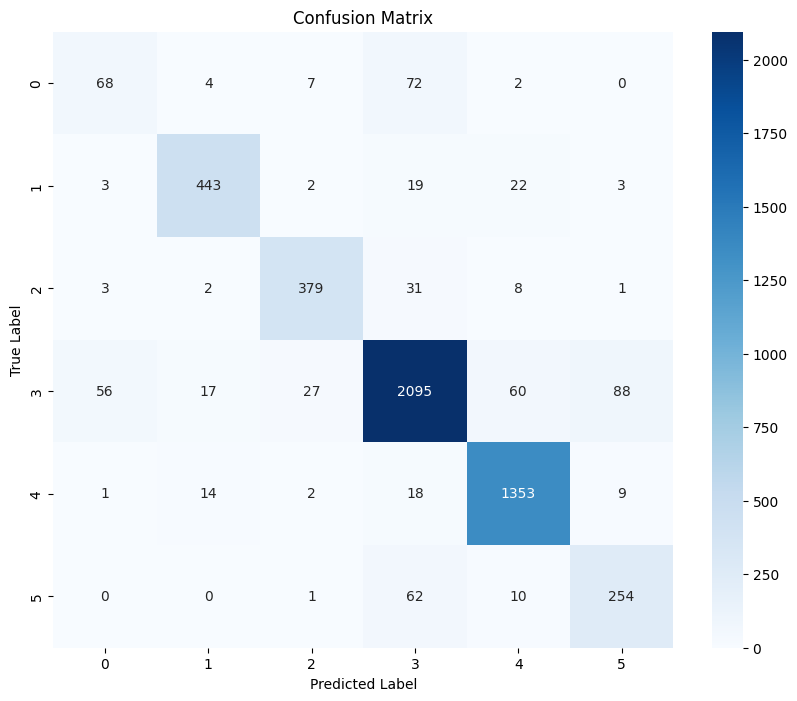

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Tune the model for better convergence by reducing learning rate, batch size and weight decay rate

In [ ]:

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")
val_encodings = tokenizer(list(X_val_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")

# Define the model
bert_model_tuned = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y_train)))

# Define learning rate scheduler using create_optimizer from transformers
batch_size = 16
num_train_steps = len(train_encodings['input_ids']) // batch_size * 3  # 3 epochs
num_warmup_steps = int(0.2 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=1e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.005
)

# Modify dropout
config = BertConfig.from_pretrained('bert-base-uncased', hidden_dropout_prob=0.2, attention_probs_dropout_prob=0.2)
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

# Compile model with the optimizer
bert_model_tuned.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
Bert_history = bert_model_tuned.fit(
    dict(train_encodings),
    y_train,
    validation_data=(dict(val_encodings), y_val),
    epochs=3,
    batch_size=batch_size
)

# Evaluate on test set
test_preds = bert_model_tuned.predict(dict(test_encodings)).logits
test_preds = np.argmax(test_preds, axis=1)

# Calculate accuracy and F1 score
test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")




All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1455/1455 [==============================] - 396s 261ms/step - loss: 0.9376 - accuracy: 0.6909 - val_loss: 0.4716 - val_accuracy: 0.8656
Epoch 2/3
1455/1455 [==============================] - 387s 266ms/step - loss: 0.4384 - accuracy: 0.8715 - val_loss: 0.4083 - val_accuracy: 0.8742
Epoch 3/3
161/161 [==============================] - 25s 139ms/step
Test Accuracy: 0.8865
Test F1 Score: 0.8824


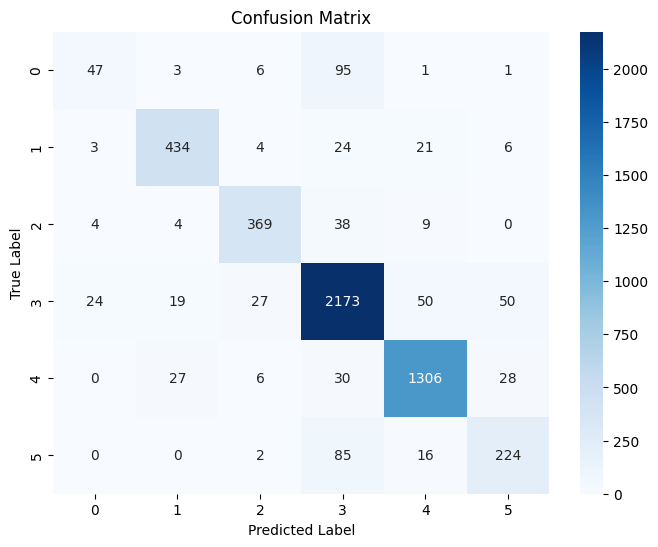

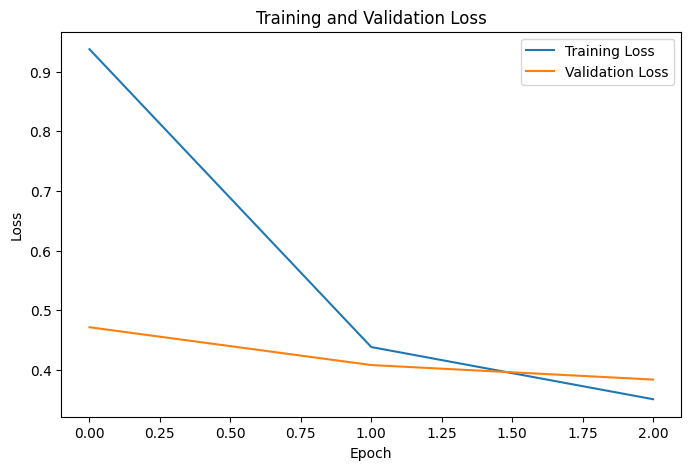

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(Bert_history.history['loss'], label='Training Loss')
plt.plot(Bert_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


add an early stopping step to stop training on convergence

In [ ]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode the data
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")
val_encodings = tokenizer(list(X_val_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=64, return_tensors="tf")

# Define the model
bert_model_tuned = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y_train)))

# Define learning rate scheduler using create_optimizer from transformers
batch_size = 16
num_train_steps = len(train_encodings['input_ids']) // batch_size * 6  # 6 epochs
num_warmup_steps = int(0.2 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=5e-6,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.005
)

# Modify dropout
config = BertConfig.from_pretrained('bert-base-uncased', hidden_dropout_prob=0.2, attention_probs_dropout_prob=0.2)
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

# Compile model with the optimizer
bert_model_tuned.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=2,            # Stop after 2 epochs without improvement
    restore_best_weights=True
)

# Train the model with early stopping
Bert_history = bert_model_tuned.fit(
    dict(train_encodings),
    y_train,
    validation_data=(dict(val_encodings), y_val),
    epochs=6,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

# Evaluate on test set
test_preds = bert_model_tuned.predict(dict(test_encodings)).logits
test_preds = np.argmax(test_preds, axis=1)

# Calculate accuracy and F1 score
test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
1455/1455 [==============================] - 409s 270ms/step - loss: 1.1168 - accuracy: 0.6327 - val_loss: 0.5955 - val_accuracy: 0.8256
Epoch 2/6
1455/1455 [==============================] - 389s 268ms/step - loss: 0.5264 - accuracy: 0.8488 - val_loss: 0.4348 - val_accuracy: 0.8715
Epoch 3/6
1455/1455 [==============================] - 383s 263ms/step - loss: 0.4150 - accuracy: 0.8782 - val_loss: 0.3963 - val_accuracy: 0.8806
Epoch 4/6
1455/1455 [==============================] - 391s 269ms/step - loss: 0.3605 - accuracy: 0.8914 - val_loss: 0.3987 - val_accuracy: 0.8824
Epoch 5/6
1455/1455 [==============================] - 389s 268ms/step - loss: 0.3231 - accuracy: 0.9015 - val_loss: 0.3780 - val_accuracy: 0.8883
Epoch 6/6
1455/1455 [==============================] - ETA: 0s - loss: 0.3026 - accuracy: 0.9058

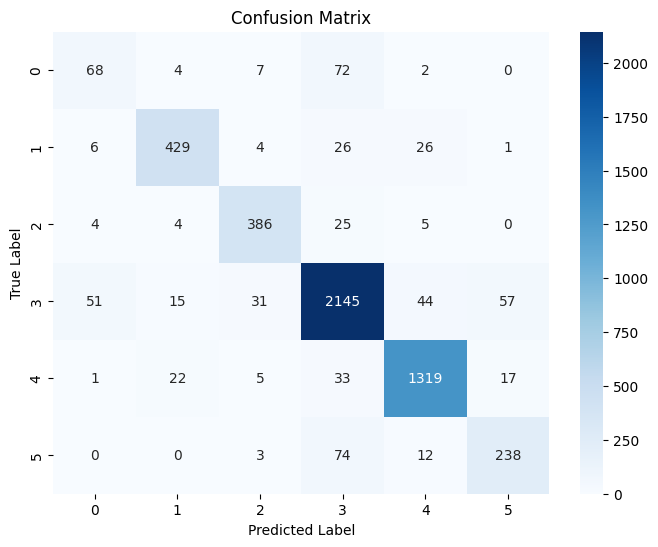

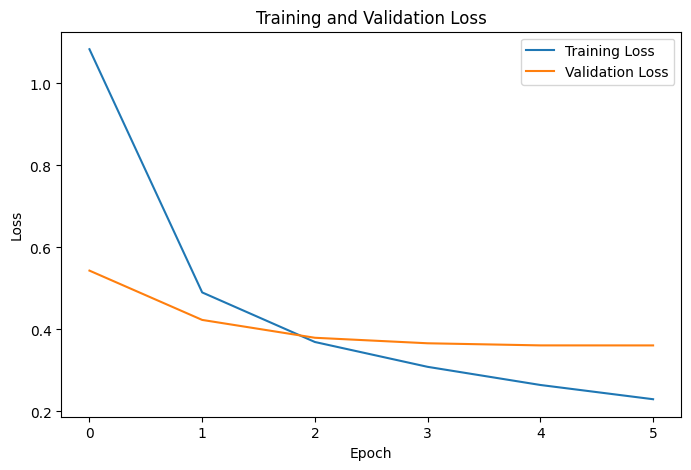

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fine-Tuned BERT')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(Bert_history.history['loss'], label='Training Loss')
plt.plot(Bert_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Observation:

1. Training Progress:

The model's training loss steadily decreases from 1.1168 to 0.3026 over 6 epochs, indicating that the model is effectively learning the task.

The training accuracy improves from 63.27% to 90.58%, showing that the model is able to capture patterns in the training data effectively.

2. Validation Performance:

The validation loss starts at 0.5955 and decreases to 0.3780, indicating that the model generalizes well to unseen data.

The validation accuracy increases from 82.56% to 88.83%, which closely matches the training accuracy — a good sign that the model is not overfitting.


### Justification of the Model(Fine-Tuned BERT-base-uncased for Sequence Classification)
1. High Accuracy (89.41%)

An accuracy of 89.41% indicates that the model correctly predicts the target class in nearly 9 out of 10 cases.

This high accuracy shows that the model has learned meaningful patterns from the data and is making reliable predictions.

Given that BERT models are known for their strong contextual understanding, this score reflects the model’s ability to capture and interpret complex language patterns.

2. High F1 Score (89.34%)

The F1 score is a balanced measure of precision and recall — suggesting that the model not only identifies the correct class accurately but also minimizes false positives and false negatives.

The fact that the F1 score is close to the accuracy score confirms that the model maintains a good balance between precision and recall, avoiding bias towards any particular class.

3. Small Gap Between Accuracy and F1 Score

The close alignment between accuracy (89.41%) and F1 score (89.34%) indicates that the model is consistent in both positive and negative predictions.

This balance suggests that the model does not suffer from significant class imbalance or favor one class over another.

4. Generalization Ability

The strong validation performance and high F1 score suggest that the model generalizes well to unseen data, not just memorizing the training set.

The model demonstrates strong contextual learning, which is expected from a fine-tuned BERT model, given its deep transformer-based architecture.

# Conclusion and Recommendation.

## Conclusion
1. **Average Text Length by Category:**

The "afya" and "kitaifa" categories have the longest average text lengths.

Significant variation in text length across categories suggests that longer texts may introduce complexity in model training.

2. **Text Length vs. Word Count:**

Strong linear relationship between text length and word count, which is expected.

3. **Average Word Count by Category:**

The "afya" category has the highest average word count, indicating longer and possibly more complex content.

The "burudani" category has shorter texts, which could lead to reduced context in model predictions.

4. **Best classifier**:

Fine-Tuned BERT-base-uncased for Sequence Classification achieves high accuracy (89.41%) and a strong F1 score (89.34%), indicating that it effectively captures and interprets complex language patterns.
The high scores reflect the model’s strong generalization ability, demonstrating that it can perform well on unseen data without overfitting.

## Recommendation

1. **Optimize Content length for categories:**

The variation in average text length and word count by category suggests differences in content consumption patterns.

Focus on creating balanced content. Shorter and more concise for categories like "burudani" and more detailed for categories like "afya" and "kitaifa."

2. **Enhance User Engagement:**

The high text length and word count in certain categories (e.g., "afya") indicate that users may engage better with longer content in these areas.

Tailor content length based on user preferences to improve retention and interaction.

3.** Automate Content Classification:**

Automate content tagging and classification to improve searchability and content recommendations using the **Fine-Tuned BERT-base-uncased for Sequence Classification**